<a href="https://colab.research.google.com/github/maurofama99/ann_challenge/blob/main/ANN_challenge2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Setup

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
%cd /gdrive/My Drive/ANN/data1

/gdrive/My Drive/ANN/data1


Import libraries

In [3]:
import tensorflow as tf
import numpy as np
import os
import random
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from PIL import Image

tfk = tf.keras
tfkl = tf.keras.layers
print(tf.__version__)

2.9.2


seed for reproducivity

In [4]:
# Random seed for reproducibility
seed = 42

random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
np.random.seed(seed)
tf.random.set_seed(seed)
tf.compat.v1.set_random_seed(seed)

suppress warnings

In [5]:
import warnings
import logging

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)
tf.get_logger().setLevel('INFO')
tf.autograph.set_verbosity(0)

tf.get_logger().setLevel(logging.ERROR)
tf.get_logger().setLevel('ERROR')
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

## Exploration Data Analysis (EDA)

unzip data file

In [6]:
# Load the dataset to be used for classification
if not os.path.exists('x_train.npy'):
  !unzip training_dataset_homework2.zip

In [7]:
x_train = np.load('x_train.npy', encoding='bytes')
y_train = np.load('y_train.npy', encoding='bytes')

In [ ]:
x_train

array([[[ 1.7597e+01,  8.1713e+00, -1.7842e+00, -1.9706e+01,
         -9.7135e+00, -6.1887e+01],
        [ 2.2974e-01, -5.8956e+00,  1.6837e+01,  5.0390e+00,
          2.4332e+00,  5.8914e+01],
        [-2.9654e+01, -2.1296e+01,  2.9103e+01, -4.7503e-01,
          7.5391e+01,  1.0665e+01],
        ...,
        [ 1.1982e+02,  2.1849e+02,  1.6398e+03,  5.9787e+02,
          2.1922e+03,  1.8484e+01],
        [ 9.1591e+01,  1.0378e+02,  1.8238e+03,  1.2460e+03,
          1.1301e+04,  7.5107e+02],
        [ 4.3719e+01,  3.0689e+01,  9.5092e+02,  8.5927e+02,
          8.1331e+03,  9.8883e+02]],

       [[ 2.4209e+00, -5.6039e-01,  2.3654e+01, -3.8171e+00,
          1.3721e+00,  8.2510e+00],
        [ 1.6847e+00,  2.3989e+01,  1.7803e+01, -1.9575e+01,
         -8.2534e+00, -2.3959e+01],
        [ 5.0692e-01,  5.0281e+01,  5.1196e+01,  1.6036e+01,
          7.2974e-01, -1.8185e+01],
        ...,
        [-1.5618e+01, -7.4233e+00,  3.7833e+00,  1.6565e+00,
         -1.0438e+01, -5.5229e+00],
  

In [ ]:
x_train.shape

(2429, 36, 6)

In [ ]:
y_train

array([ 0,  0,  0, ..., 11, 11, 11], dtype=int32)

In [ ]:
y_train.shape

(2429,)

In [23]:
classes_list = ['Wish',         # 0
                'Another',      # 1
                'Comfortably',  # 2
                'Money',        # 3
                'Breathe',      # 4
                'Time',         # 5
                'Brain',        # 6
                'Echoes',       # 7
                'Wearing',      # 8
                'Sorrow',       # 9
                'Hey',          # 10
                'Shine']        # 11

count = [0,0,0,0,0,0,0,0,0,0,0,0]

In [ ]:
from collections import Counter

counter = Counter(y_train)
tot_number = 0;

for i in range(len(classes_list)):
  count[i] = counter[i]
  tot_number += count[i]
  print("The number of ", classes_list[i], " is: ", count[i])

print("The total number of data is: ", tot_number)

The number of  Wish  is:  34
The number of  Another  is:  123
The number of  Comfortably  is:  270
The number of  Money  is:  381
The number of  Breathe  is:  62
The number of  Time  is:  153
The number of  Brain  is:  313
The number of  Echoes  is:  68
The number of  Wearing  is:  120
The number of  Sorrow  is:  777
The number of  Hey  is:  77
The number of  Shine  is:  51
The total number of data is:  2429


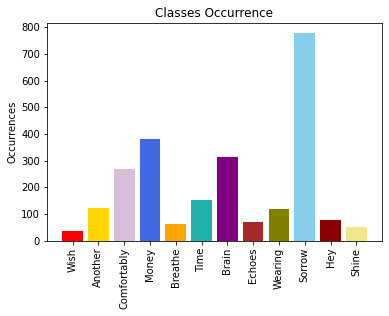

In [ ]:
erc = ['red', 'gold', 'thistle', 'royalblue', 'orange', 'lightseagreen', 'purple', 'brown', 'olive', 'skyblue', 'darkred', 'khaki']
plt.bar(classes_list, count, color = erc)
plt.title("Classes Occurrence")
plt.ylabel("Occurrences")
plt.xticks(rotation=90)
plt.yticks
plt.show()

generate the dataframe with the given data, for better management of it

In [ ]:
column_names = ['batch', 'label', 'ch1', 'ch2', 'ch3', 'ch4', 'ch5', 'ch6']

df = pd.DataFrame(columns = column_names)
for i in range(len(y_train)):
  label = classes_list[y_train[i]]
  for j in range(36):
    data = x_train[i][j]
    df = df.append({'batch' : i, 'label': label, 'ch1' : data[0], 'ch2' : data[1], 'ch3' : data[2], 'ch4' : data[3], 'ch5' : data[4], 'ch6' : data[5]}, ignore_index=True)
  

print(df)

      batch batchRow  label       ch1       ch2       ch3       ch4       ch5  \
0         0        0   Wish  17.59700   8.17130  -1.78420 -19.70600  -9.71350   
1         0        1   Wish   0.22974  -5.89560  16.83700   5.03900   2.43320   
2         0        2   Wish -29.65400 -21.29600  29.10300  -0.47503  75.39100   
3         0        3   Wish -59.21000 -29.56500  17.97100 -45.60600  19.41200   
4         0        4   Wish -72.06400 -25.85500   0.46536 -59.15100 -29.10500   
...     ...      ...    ...       ...       ...       ...       ...       ...   
87439  2428       31  Shine   3.51190  -1.03240  -1.69900   4.15790   2.75430   
87440  2428       32  Shine   0.70853  -0.94622  -1.91760   2.09480  -4.76750   
87441  2428       33  Shine   0.20638   1.02870  -0.92512  -0.71633   1.73330   
87442  2428       34  Shine   4.14290   1.09390  -0.18921   1.14100   0.93441   
87443  2428       35  Shine  -1.55450  -1.21210   1.07050   1.32720   2.40100   

           ch6  
0     -61.

In [28]:
def inspect_activity(label, df):
    data = df[df['label'] == label][['ch1', 'ch2', 'ch3','ch4','ch5','ch6']][:]
    axis = data.plot(subplots=True, figsize=(17, 9), title=label)
    for ax in axis:
        ax.legend(loc='lower right')

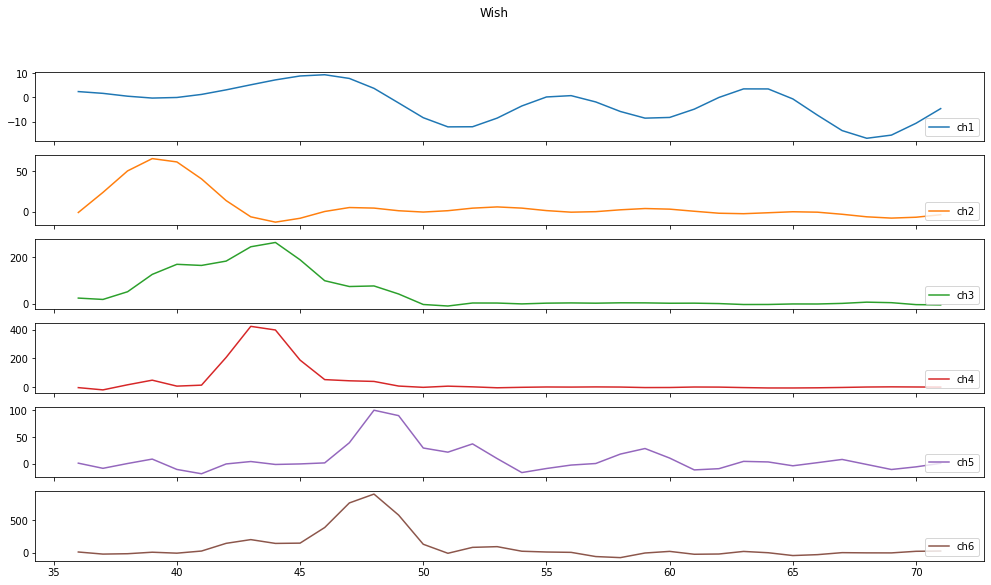

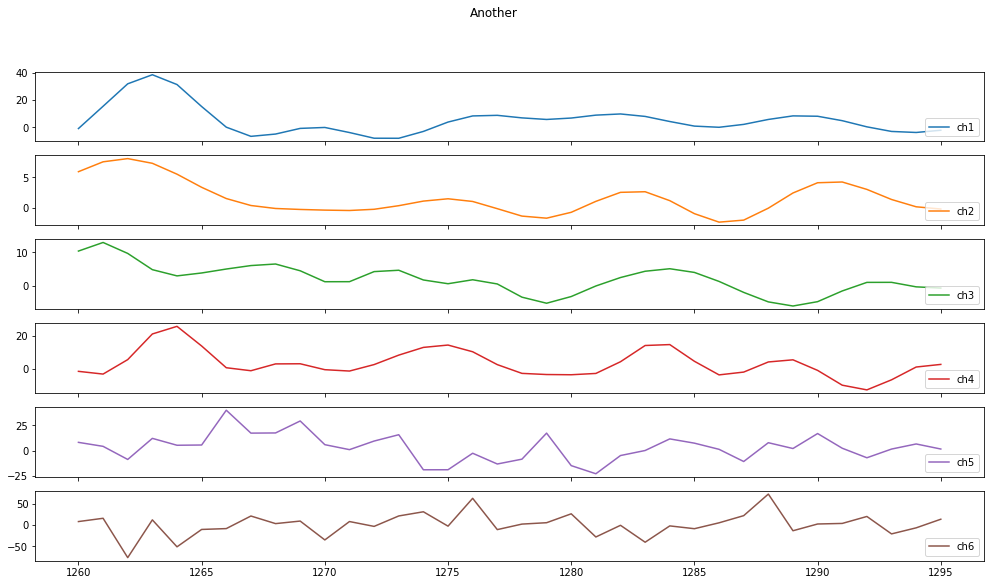

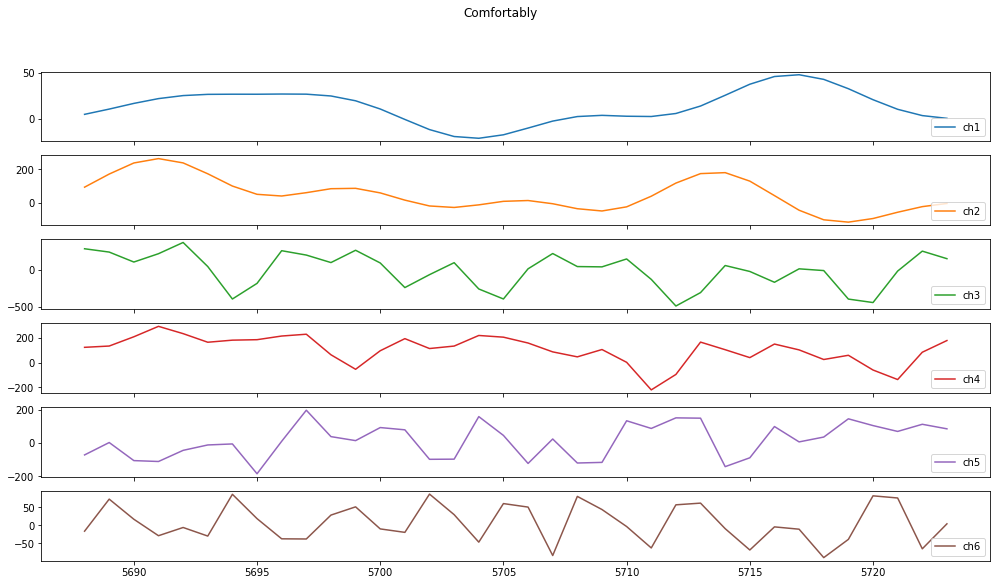

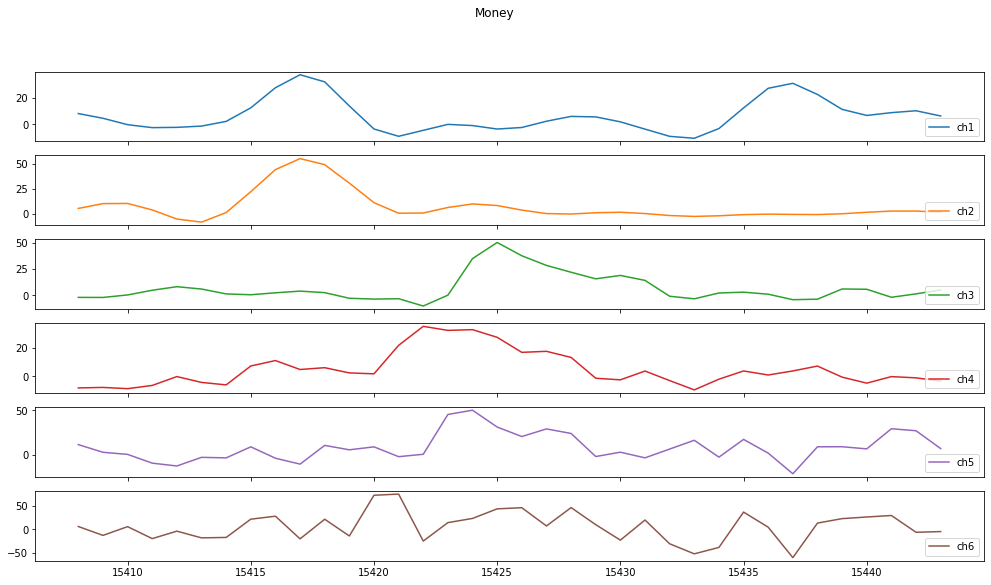

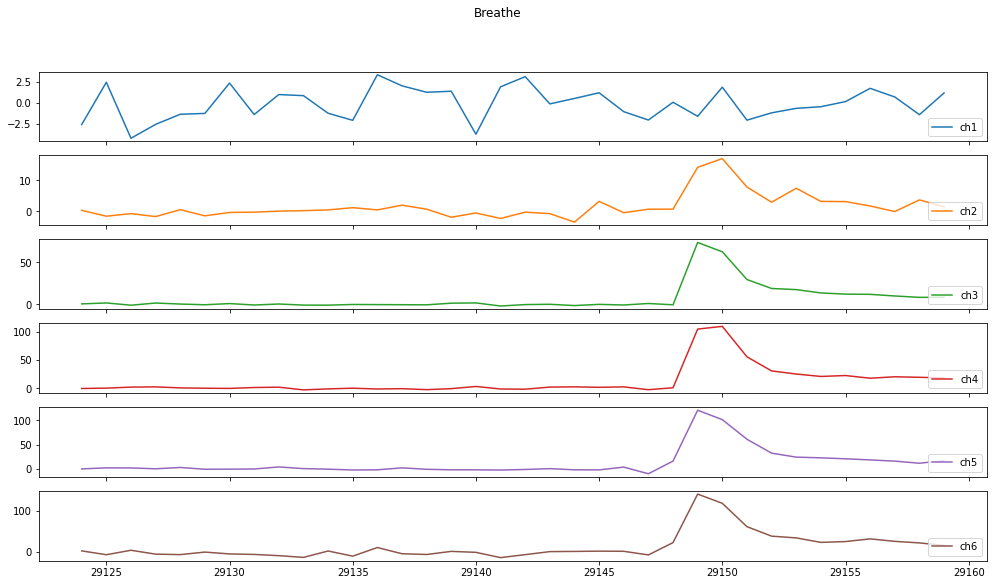

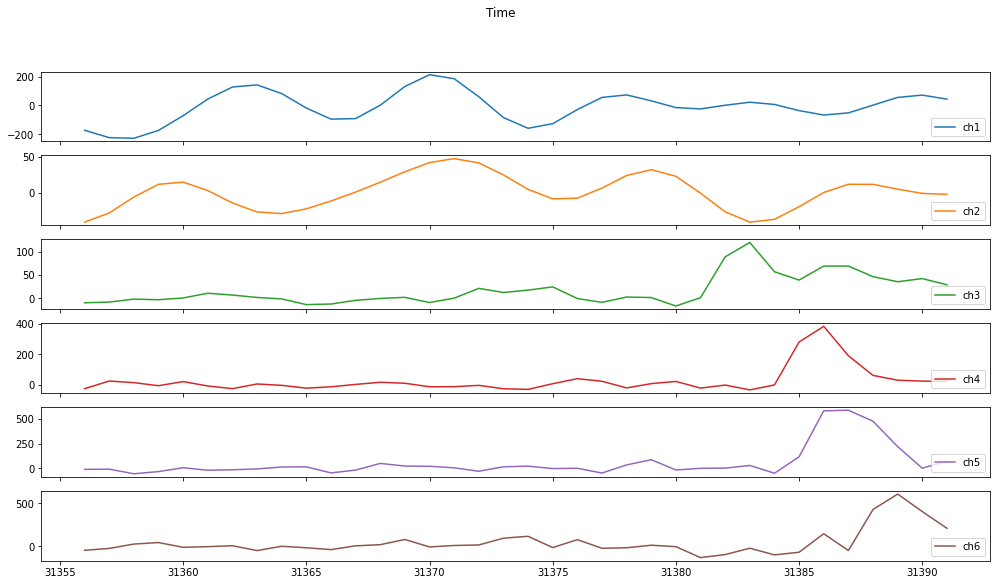

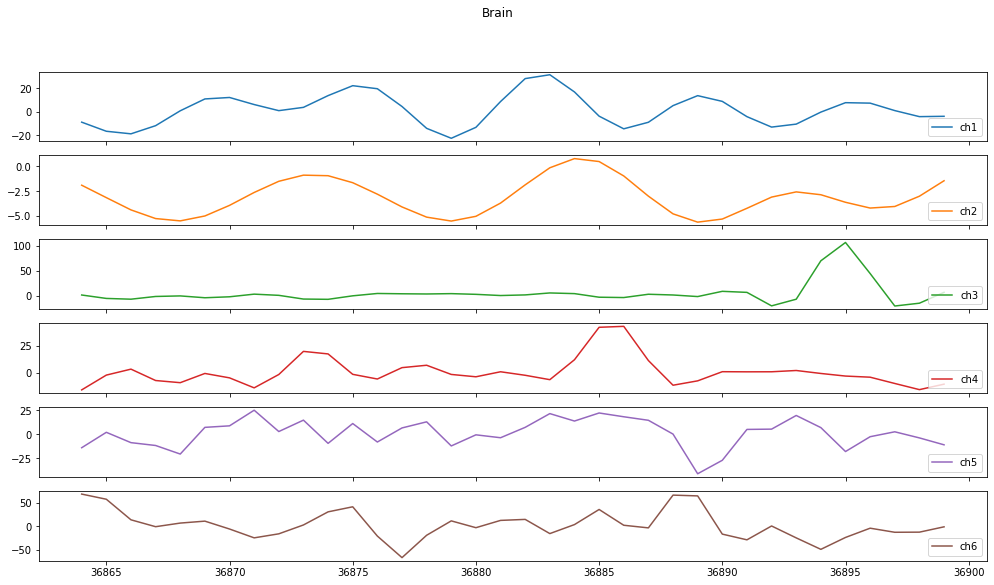

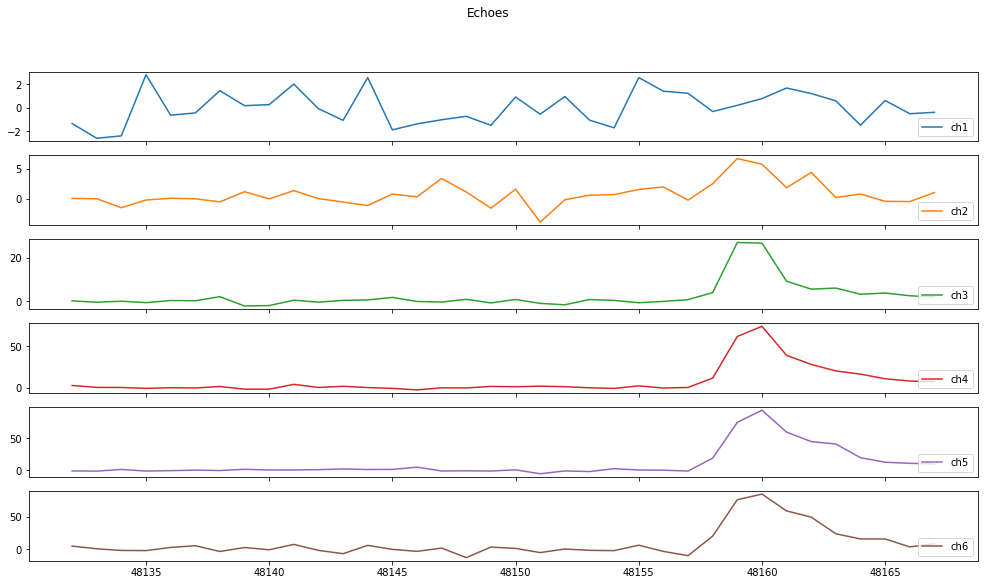

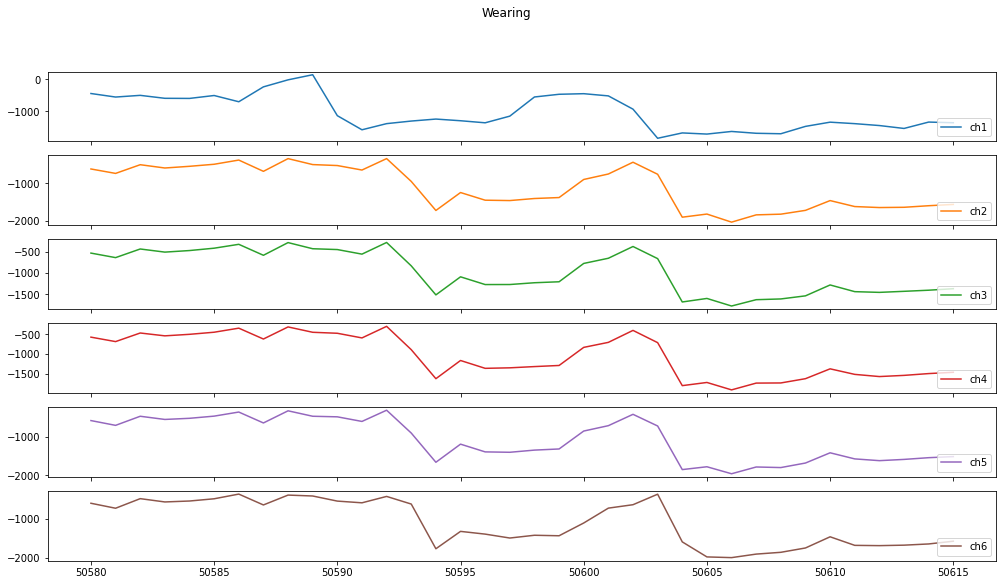

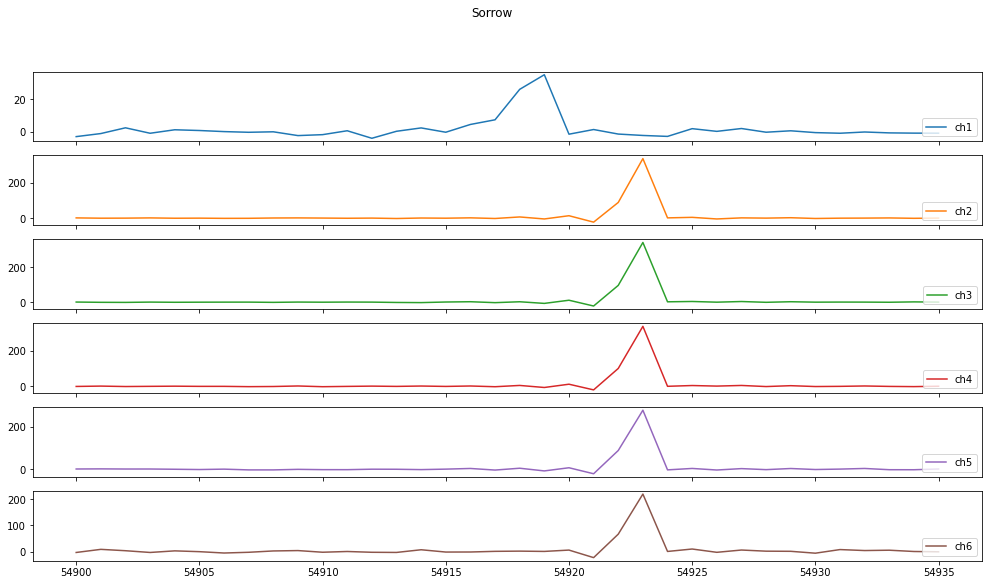

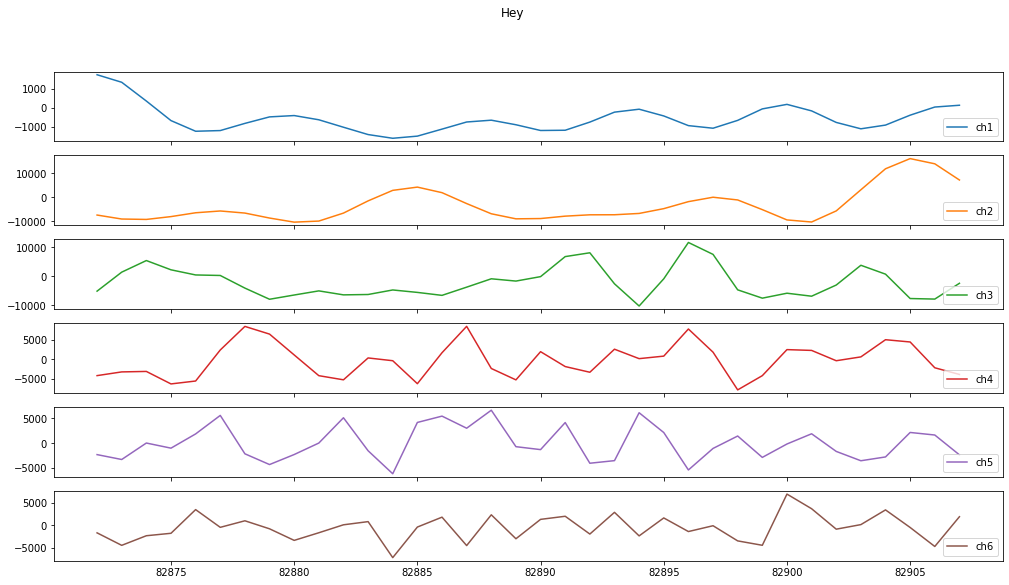

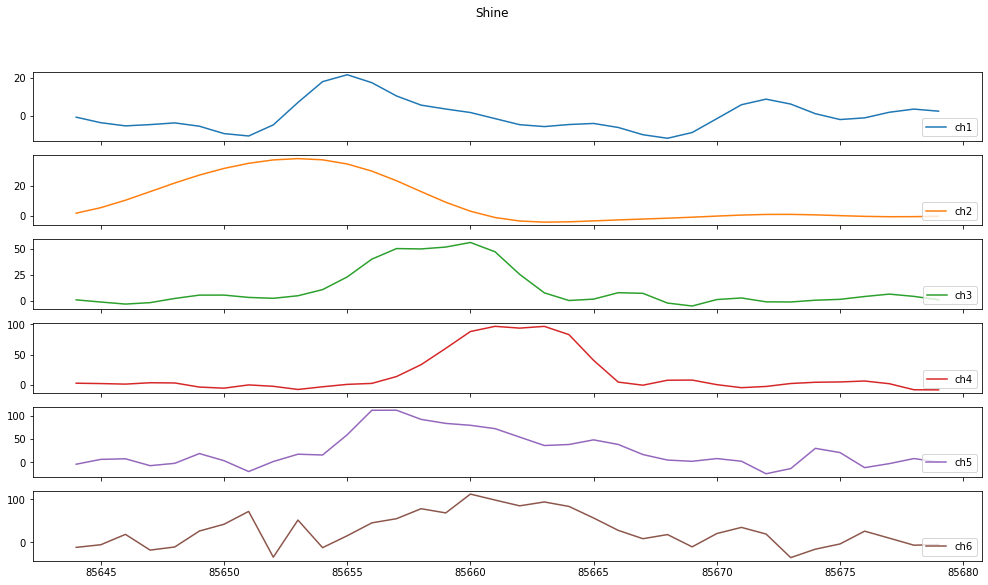

In [ ]:
for class_name in classes_list:
  inspect_activity(class_name, df)

#Try data Augmentation

In [ ]:
label = 'Wish'
data = df[df['label'] == label][['ch1', 'ch2']][:]
X_aug = my_augmenter.augment(x_train)
plt.plot(X_aug)

In [ ]:
def jitter(x, sigma=0.3):
    # https://arxiv.org/pdf/1706.00527.pdf
    return x + np.random.normal(loc=0., scale=sigma, size=x.shape)

def scaling(x, sigma=0.1):
    # https://arxiv.org/pdf/1706.00527.pdf
    factor = np.random.normal(loc=1., scale=sigma, size=(x.shape[0],x.shape[2]))
    return np.multiply(x, factor[:,np.newaxis,:])

def rotation(x):
    flip = np.random.choice([-1, 1], size=(x.shape[0],x.shape[1]))
    rotate_axis = np.arange(x.shape[1])
    np.random.shuffle(rotate_axis)    
    return flip[:,np.newaxis,:] * x[:,:,rotate_axis]

In [ ]:
label = 'Wish'
w = df[df['label'] == label][['ch1']][:]
jitter(w)

ch1
0     17.169750
1      0.803222
2    -29.846349
3    -59.289519
4    -72.334796
...         ...
1219  29.423184
1220   2.887118
1221 -14.729472
1222 -18.784319
1223 -11.252585

[1224 rows x 1 columns]

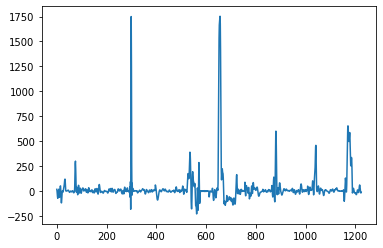

In [ ]:
plt.plot(w)

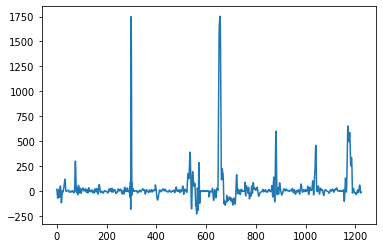

In [ ]:
plt.plot(jitter(w))

In [ ]:
w.shape[0]

1224

In [ ]:
w.shape[1]

1

In [ ]:
def permutation(x, max_segments=5, seg_mode="equal"):
    orig_steps = np.arange(x.shape[1])
    
    num_segs = np.random.randint(1, max_segments, size=(x.shape[0]))
    
    ret = np.zeros_like(x)
    for i, pat in enumerate(x):
        if num_segs[i] > 1:
            if seg_mode == "random":
                split_points = np.random.choice(x.shape[1]-2, num_segs[i]-1, replace=False)
                split_points.sort()
                splits = np.split(orig_steps, split_points)
            else:
                splits = np.array_split(orig_steps, num_segs[i])
            warp = np.concatenate(np.random.permutation(splits)).ravel()
            ret[i] = pat[warp]
        else:
            ret[i] = pat
    return ret

In [ ]:
def magnitude_warp(x, sigma=0.2, knot=4):
    from scipy.interpolate import CubicSpline
    orig_steps = np.arange(x.shape[1])
    
    random_warps = np.random.normal(loc=1.0, scale=sigma, size=(x.shape[0], knot+2, x.shape[2]))
    warp_steps = (np.ones((x.shape[2],1))*(np.linspace(0, x.shape[1]-1., num=knot+2))).T
    ret = np.zeros_like(x)
    for i, pat in enumerate(x):
        warper = np.array([CubicSpline(warp_steps[:,dim], random_warps[i,:,dim])(orig_steps) for dim in range(x.shape[2])]).T
        ret[i] = pat * warper

    return ret

def time_warp(x, sigma=0.2, knot=4):
    from scipy.interpolate import CubicSpline
    orig_steps = np.arange(x.shape[1])
    
    random_warps = np.random.normal(loc=1.0, scale=sigma, size=(x.shape[0], knot+2, x.shape[2]))
    warp_steps = (np.ones((x.shape[2],1))*(np.linspace(0, x.shape[1]-1., num=knot+2))).T
    
    ret = np.zeros_like(x)
    for i, pat in enumerate(x):
        for dim in range(x.shape[2]):
            time_warp = CubicSpline(warp_steps[:,dim], warp_steps[:,dim] * random_warps[i,:,dim])(orig_steps)
            scale = (x.shape[1]-1)/time_warp[-1]
            ret[i,:,dim] = np.interp(orig_steps, np.clip(scale*time_warp, 0, x.shape[1]-1), pat[:,dim]).T
    return ret

ValueError: ignored

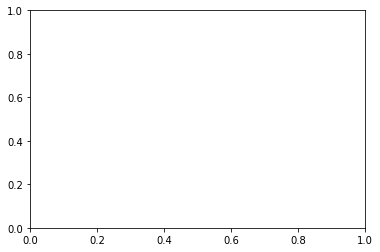

In [ ]:
plt.plot(magnitude_warp(X_train))

###SMOTE

In [15]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [9]:
dim_1 = np.array(x_train).shape[0]
dim_2 = np.array(x_train).shape[1]
dim_3 = np.array(x_train).shape[2]
print(dim_1, dim_2, dim_3)

2429 36 6


In [10]:
new_dim = dim_1 * dim_2

new_x_train = np.array(x_train).reshape(new_dim, dim_3)
print(new_x_train.shape)

(87444, 6)


In [11]:
new_y_train = []
for i in range(len(y_train)):
    # print(y_train[i])
    new_y_train.extend([y_train[i]]*dim_2)

new_y_train = np.array(new_y_train)

print(new_y_train, new_y_train.shape)

[ 0  0  0 ... 11 11 11] (87444,)


In [16]:
# transform the dataset
oversample = SMOTE()
X_Train, Y_Train = oversample.fit_resample(new_x_train, new_y_train)
# summarize the new class distribution
counter = Counter(Y_Train)
print('The number of samples in TRAIN: ', counter)

The number of samples in TRAIN:  Counter({0: 27972, 1: 27972, 2: 27972, 3: 27972, 4: 27972, 5: 27972, 6: 27972, 7: 27972, 8: 27972, 9: 27972, 10: 27972, 11: 27972})


In [17]:
x_train_SMOTE = X_Train.reshape(int(X_Train.shape[0]/dim_2), dim_2, dim_3)
print(x_train_SMOTE.shape)

(9324, 36, 6)


In [18]:
y_train_SMOTE = []
for i in range(int(X_Train.shape[0]/dim_2)):
    # print(i)
    value_list = list(Y_Train.reshape(int(X_Train.shape[0]/dim_2), dim_2)[i])
    # print(list(set(value_list)))
    y_train_SMOTE.extend(list(set(value_list)))
    ## Check: if there is any different value in a list 
    if len(set(value_list)) != 1:
        print('\n\n********* STOP: THERE IS SOMETHING WRONG IN TRAIN ******\n\n')
    

In [20]:
print(y_train_SMOTE, len(y_train_SMOTE))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 

In [21]:
counter = Counter(y_train_SMOTE)
print('The number of samples in TRAIN: ', counter)

The number of samples in TRAIN:  Counter({0: 777, 1: 777, 2: 777, 3: 777, 4: 777, 5: 777, 6: 777, 7: 777, 8: 777, 9: 777, 10: 777, 11: 777})


In [22]:
y_train_SMOTE = np.array(y_train_SMOTE)
print(y_train_SMOTE, y_train_SMOTE.shape)

[ 0  0  0 ... 11 11 11] (9324,)


In [24]:
counter = Counter(y_train_SMOTE)
tot_number = 0;

for i in range(len(classes_list)):
  count[i] = counter[i]
  tot_number += count[i]
  print("The number of ", classes_list[i], " is: ", count[i])

print("The total number of data is: ", tot_number)

The number of  Wish  is:  777
The number of  Another  is:  777
The number of  Comfortably  is:  777
The number of  Money  is:  777
The number of  Breathe  is:  777
The number of  Time  is:  777
The number of  Brain  is:  777
The number of  Echoes  is:  777
The number of  Wearing  is:  777
The number of  Sorrow  is:  777
The number of  Hey  is:  777
The number of  Shine  is:  777
The total number of data is:  9324


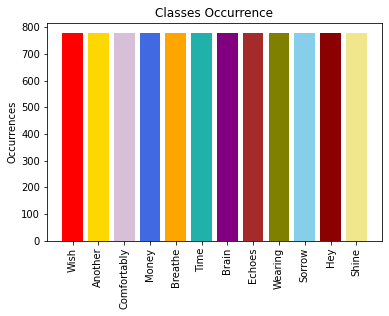

In [25]:
erc = ['red', 'gold', 'thistle', 'royalblue', 'orange', 'lightseagreen', 'purple', 'brown', 'olive', 'skyblue', 'darkred', 'khaki']
plt.bar(classes_list, count, color = erc)
plt.title("Classes Occurrence")
plt.ylabel("Occurrences")
plt.xticks(rotation=90)
plt.yticks
plt.show()

In [27]:
column_names = ['batch', 'label', 'ch1', 'ch2', 'ch3', 'ch4', 'ch5', 'ch6']

df2 = pd.DataFrame(columns = column_names)
for i in range(len(y_train_SMOTE)):
  label = classes_list[y_train_SMOTE[i]]
  for j in range(36):
    data = x_train_SMOTE[i][j]
    df2 = df2.append({'batch' : i, 'label': label, 'ch1' : data[0], 'ch2' : data[1], 'ch3' : data[2], 'ch4' : data[3], 'ch5' : data[4], 'ch6' : data[5]}, ignore_index=True)
  

print(df2)

       batch  label        ch1        ch2         ch3         ch4        ch5  \
0          0   Wish  17.597000   8.171300   -1.784200  -19.706000  -9.713500   
1          0   Wish   0.229740  -5.895600   16.837000    5.039000   2.433200   
2          0   Wish -29.654000 -21.296000   29.103000   -0.475030  75.391000   
3          0   Wish -59.210000 -29.565000   17.971000  -45.606000  19.412000   
4          0   Wish -72.064000 -25.855000    0.465360  -59.151000 -29.105000   
...      ...    ...        ...        ...         ...         ...        ...   
335659  9323  Shine   0.275496  -1.033692   -0.069098   -0.397102  -0.599964   
335660  9323  Shine  -9.496305  -7.273978    2.924631   -1.393000  16.335159   
335661  9323  Shine  -4.558241   1.270570   -1.604095   -4.314987  33.918001   
335662  9323  Shine  15.229669   1.061303   -5.587193  -12.748450   7.695468   
335663  9323  Shine  21.445295  39.501761  200.865003  367.096871  14.420531   

              ch6  
0      -61.887000  

In [48]:
df2.head(700)

batch label       ch1       ch2        ch3         ch4        ch5  \
0       0  Wish  17.59700    8.1713   -1.78420   -19.70600    -9.7135   
1       0  Wish   0.22974   -5.8956   16.83700     5.03900     2.4332   
2       0  Wish -29.65400  -21.2960   29.10300    -0.47503    75.3910   
3       0  Wish -59.21000  -29.5650   17.97100   -45.60600    19.4120   
4       0  Wish -72.06400  -25.8550    0.46536   -59.15100   -29.1050   
..    ...   ...       ...       ...        ...         ...        ...   
695    19  Wish -74.38600 -408.5300 -937.28000 -1412.70000 -1901.0000   
696    19  Wish -87.34600 -399.3100 -946.47000 -1411.60000 -1912.2000   
697    19  Wish -85.31800 -400.2900 -950.31000 -1421.70000 -1927.6000   
698    19  Wish -71.80700 -410.0800 -938.47000 -1423.10000 -1949.8000   
699    19  Wish -64.70500 -421.6900 -938.17000 -1411.70000 -1930.1000   

          ch6  
0     -61.887  
1      58.914  
2      10.665  
3     -43.014  
4     -11.913  
..        ...  
695 -2283.500  
696 -2310.400  
697 -2283.900  
698 -2320.200  
699 -2299.500  

[700 rows x 8 columns]

In [46]:
def inspect_activity(label, df):
    data = df[df['label'] == label][['ch1', 'ch2', 'ch3','ch4','ch5','ch6']][-20000:]
    axis = data.plot(subplots=True, figsize=(17, 9), title=label)
    for ax in axis:
        ax.legend(loc='lower right')

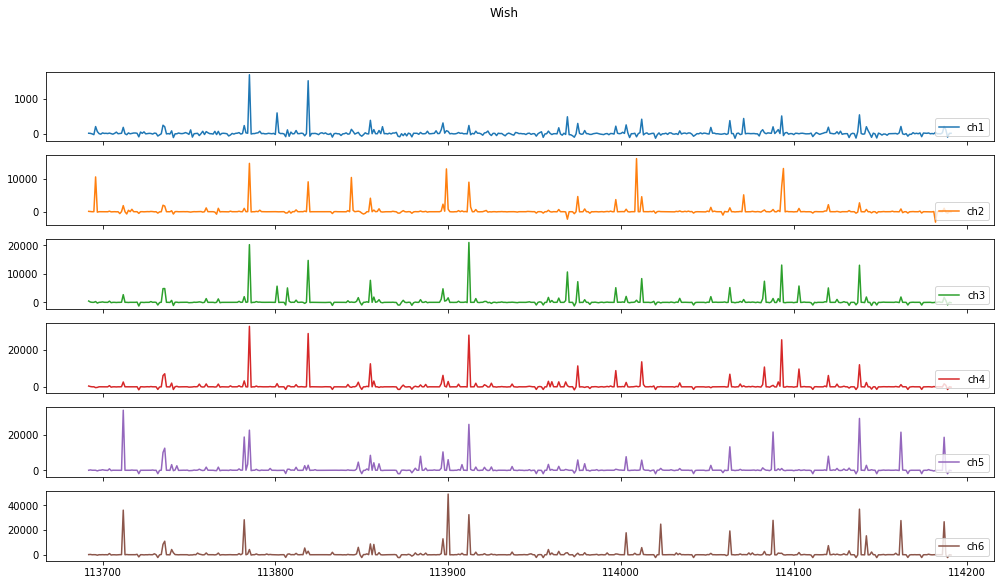

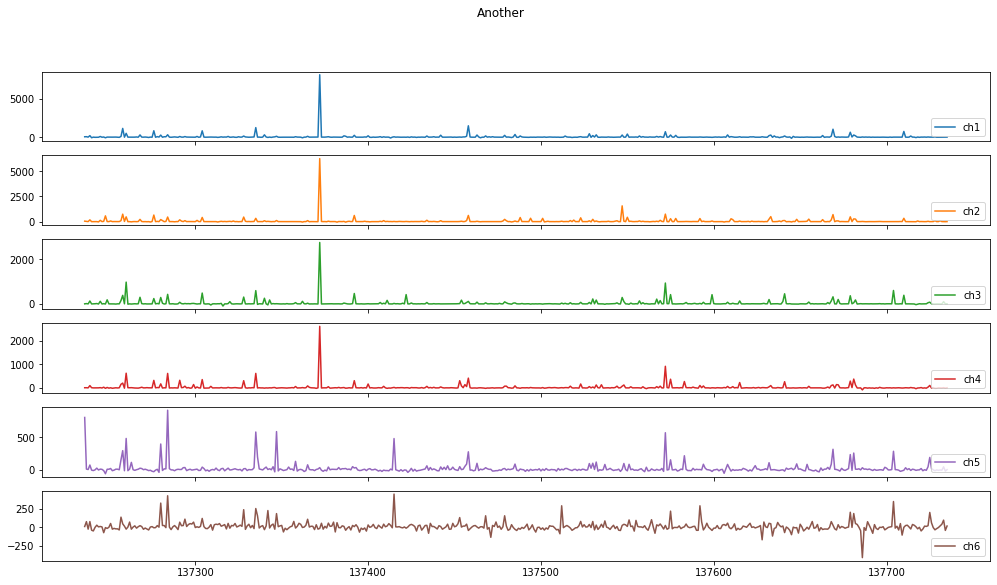

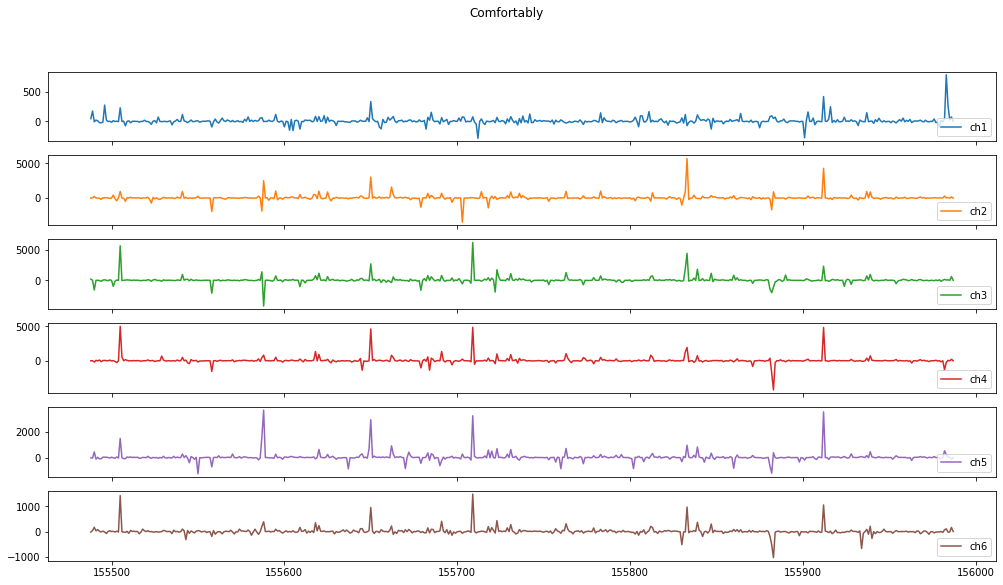

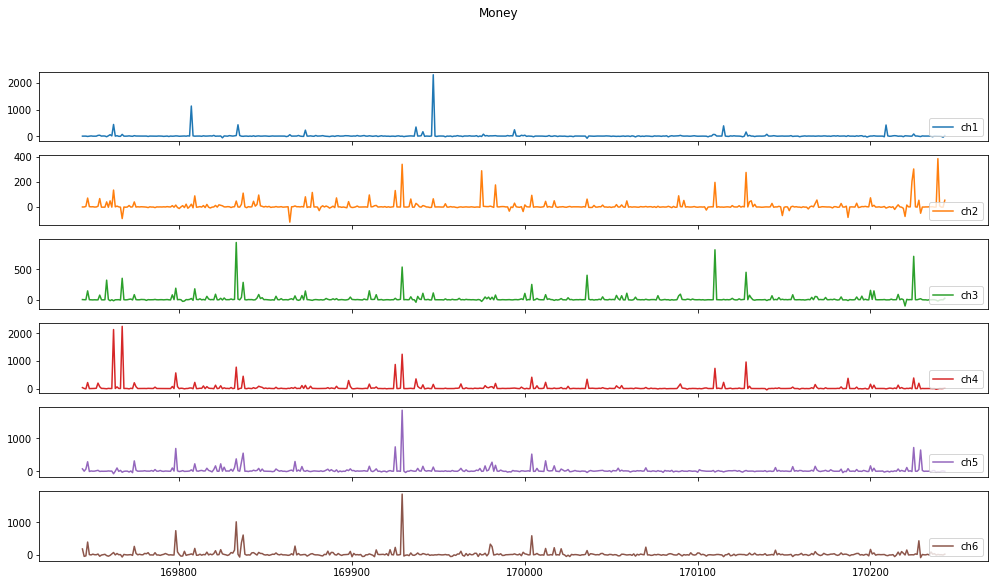

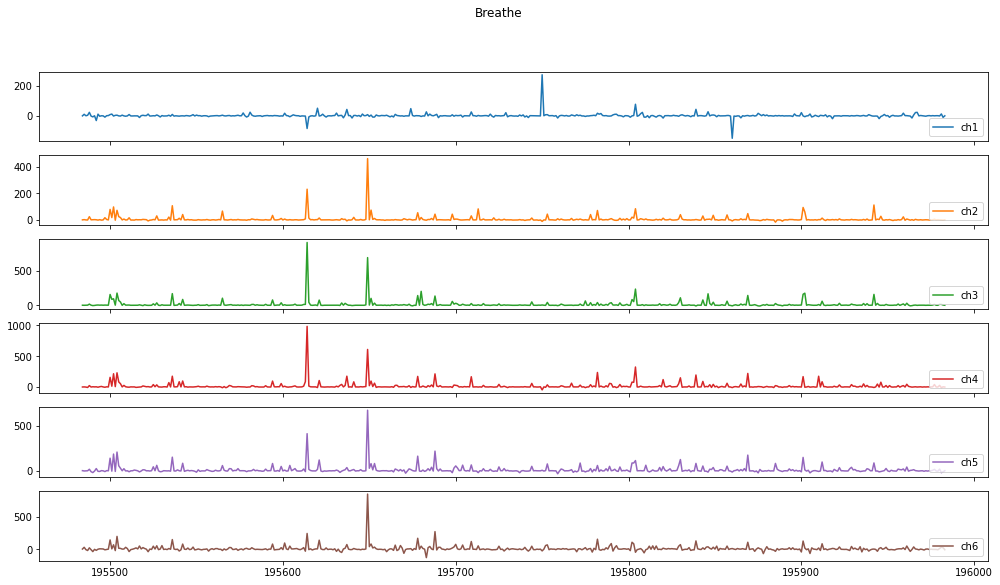

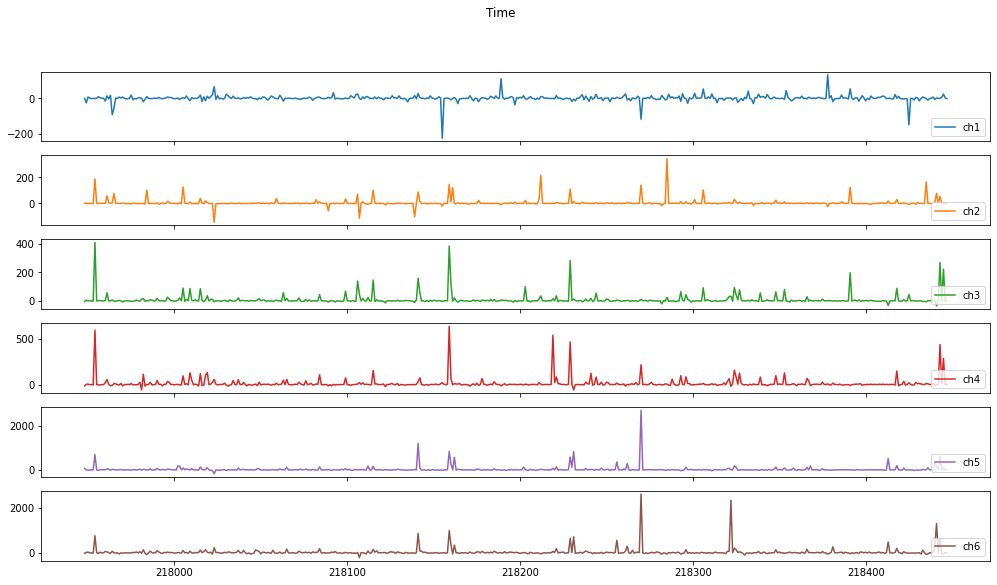

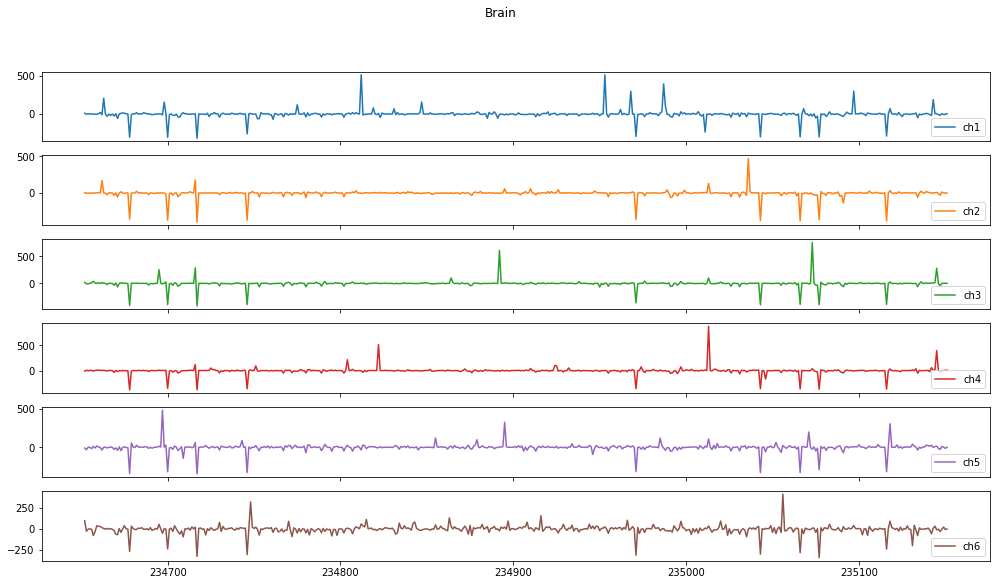

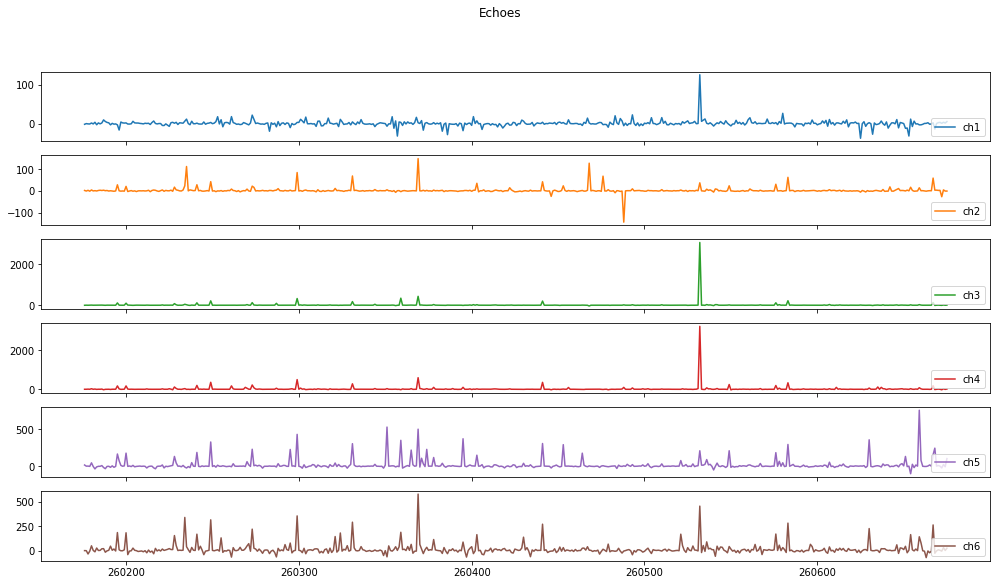

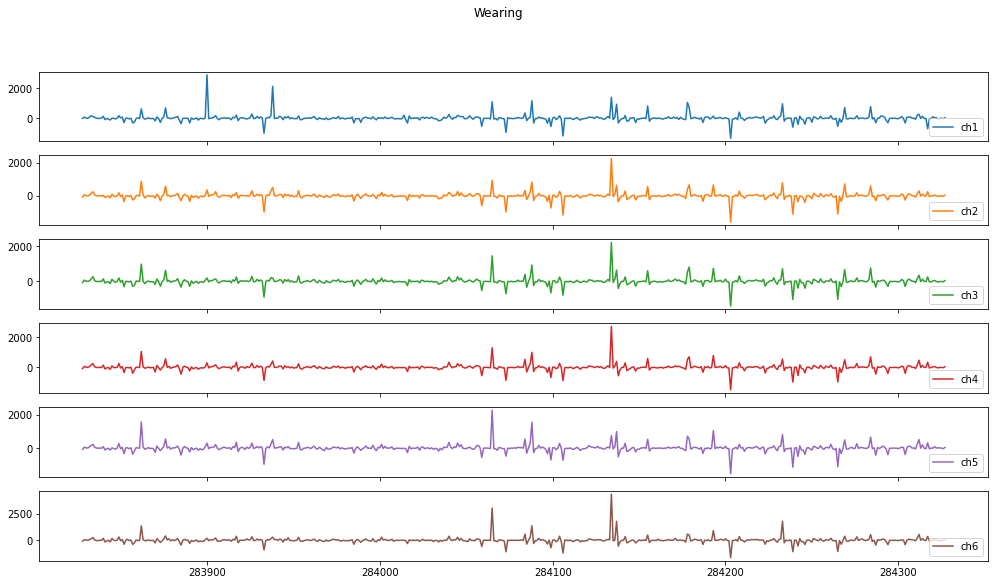

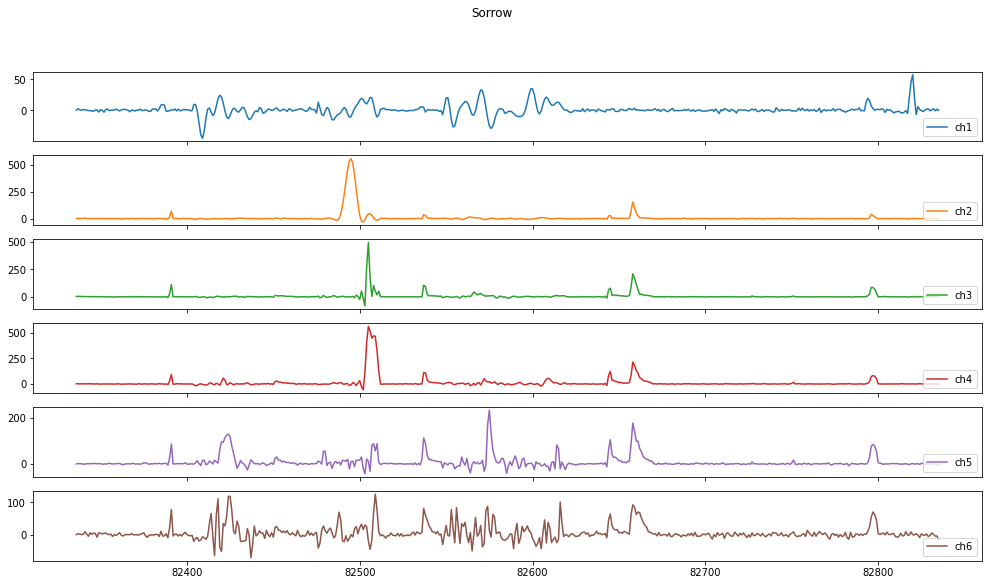

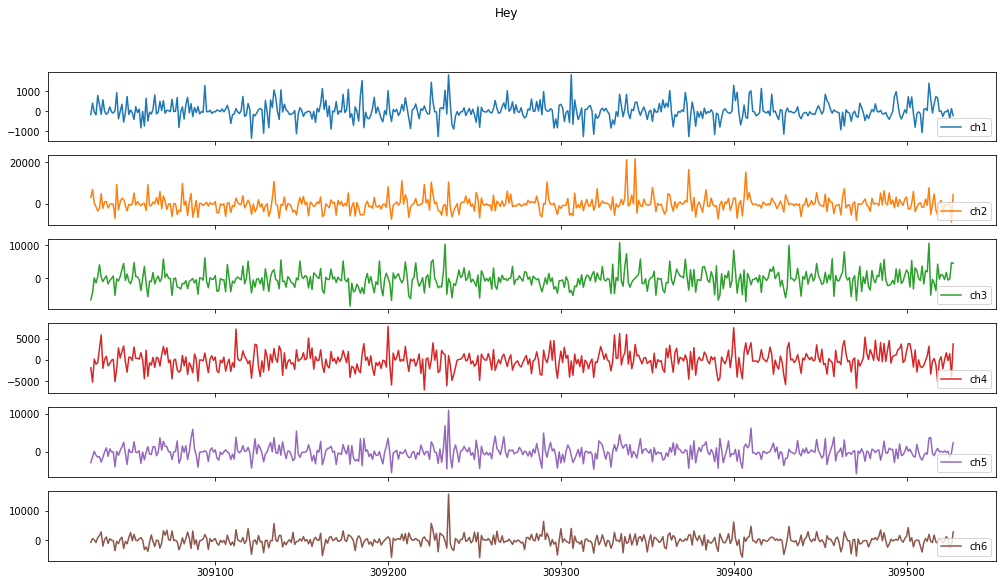

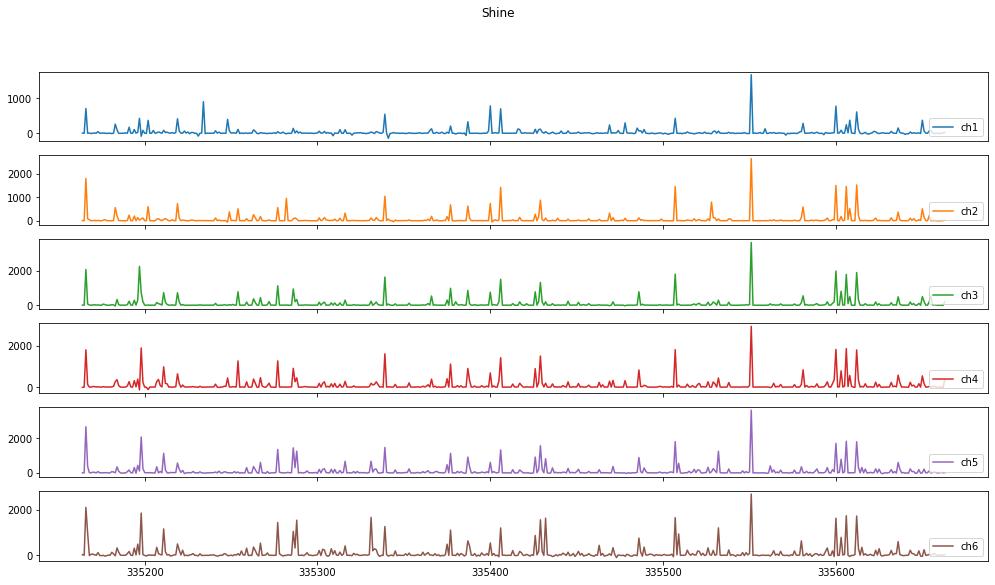

In [35]:
for class_name in classes_list:
  inspect_activity(class_name, df2)

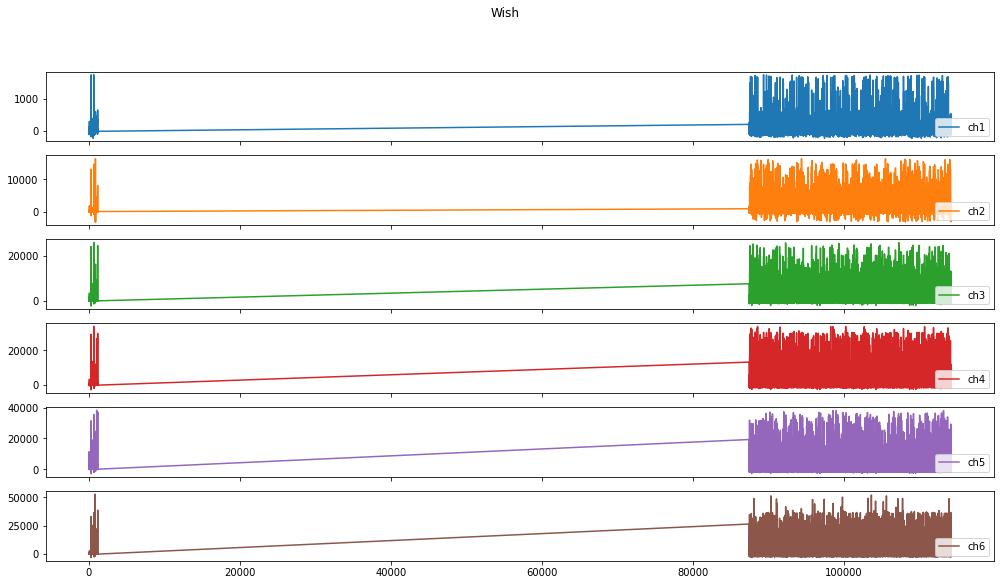

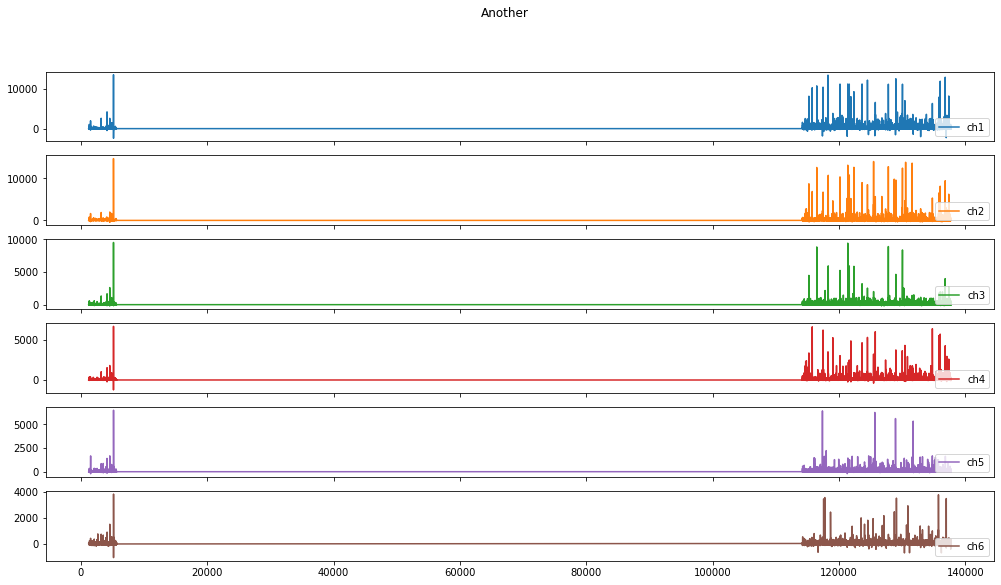

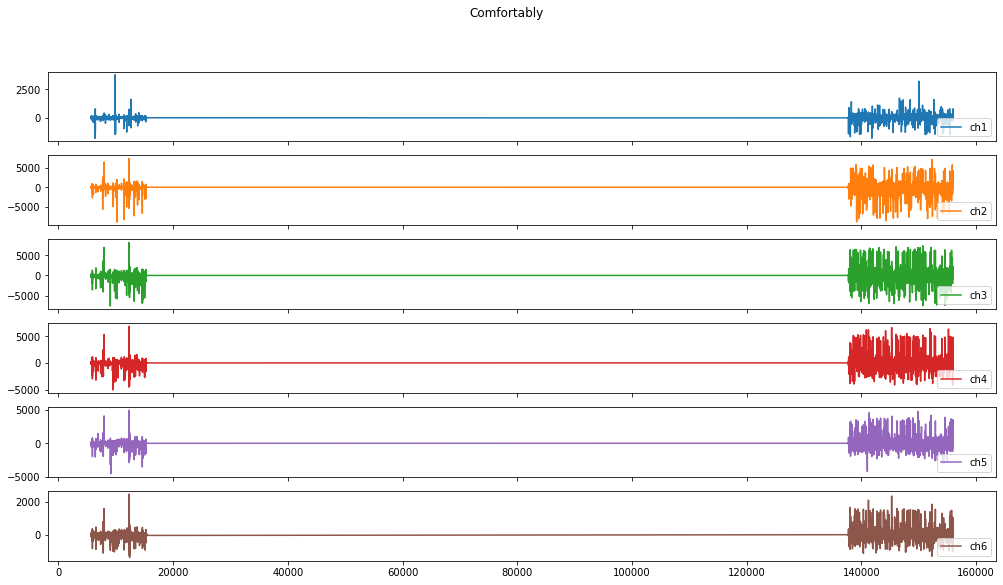

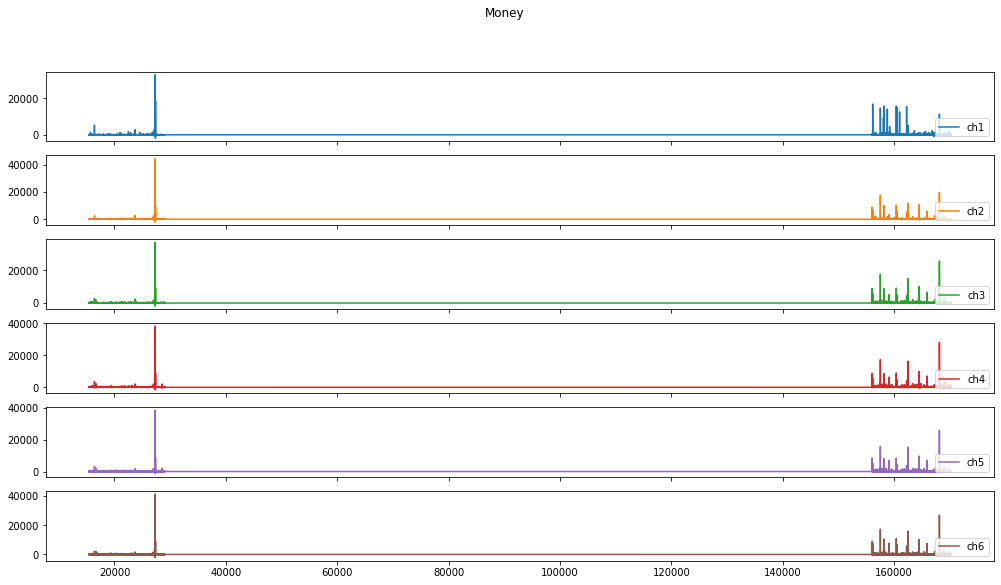

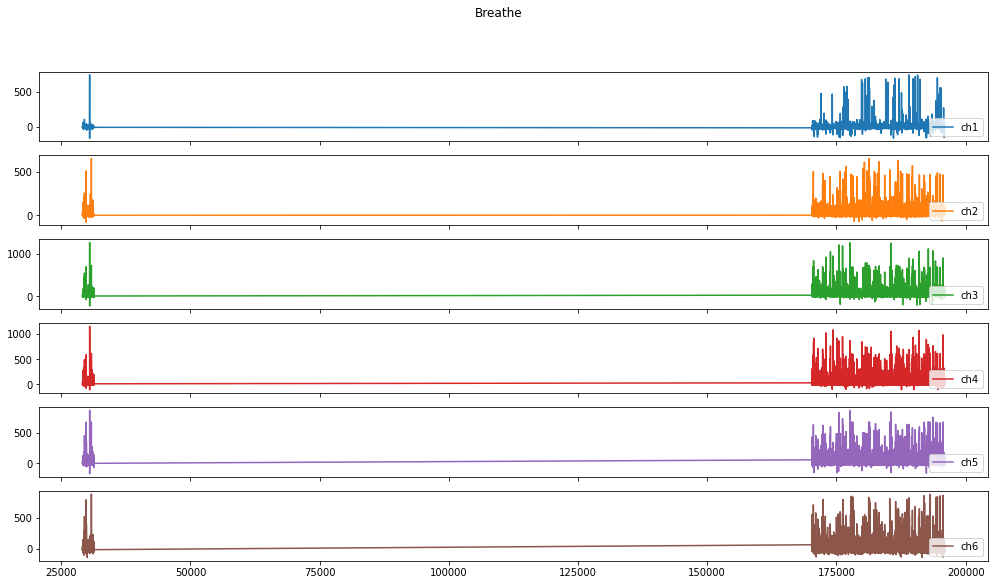

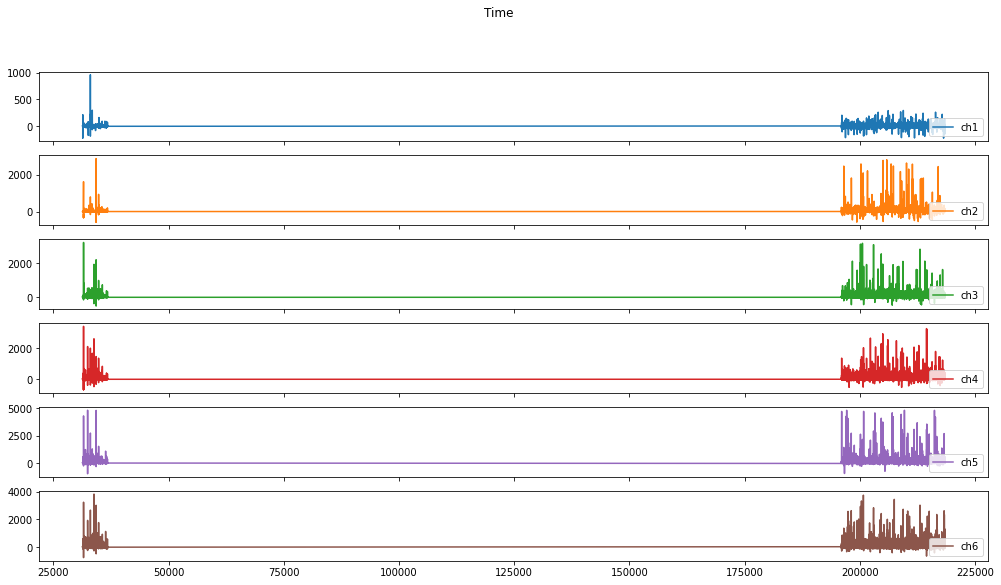

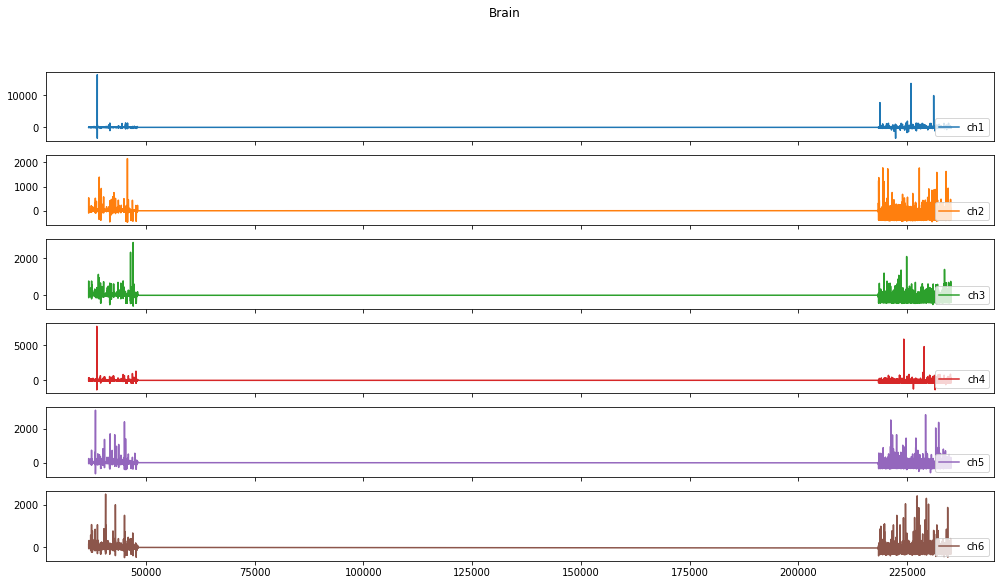

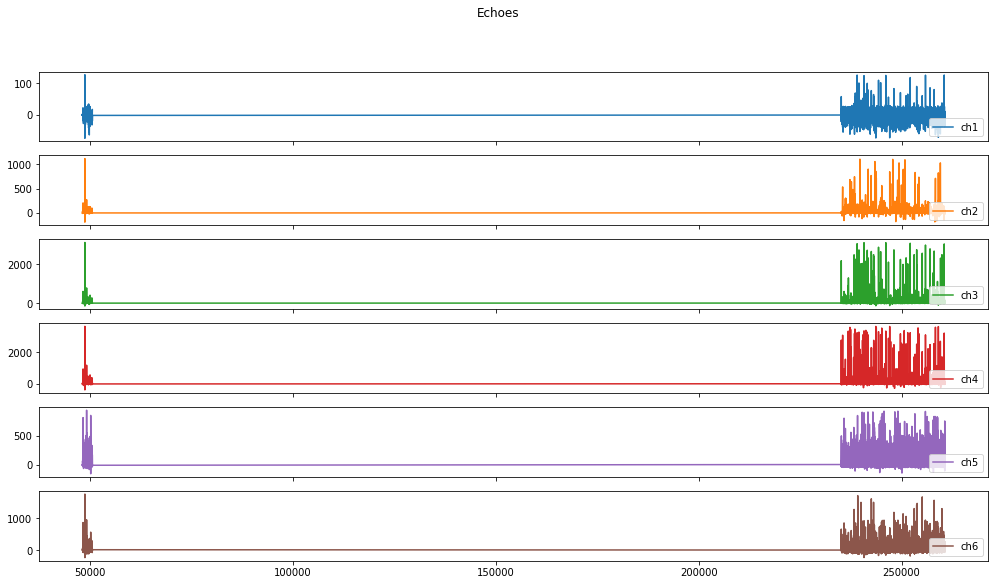

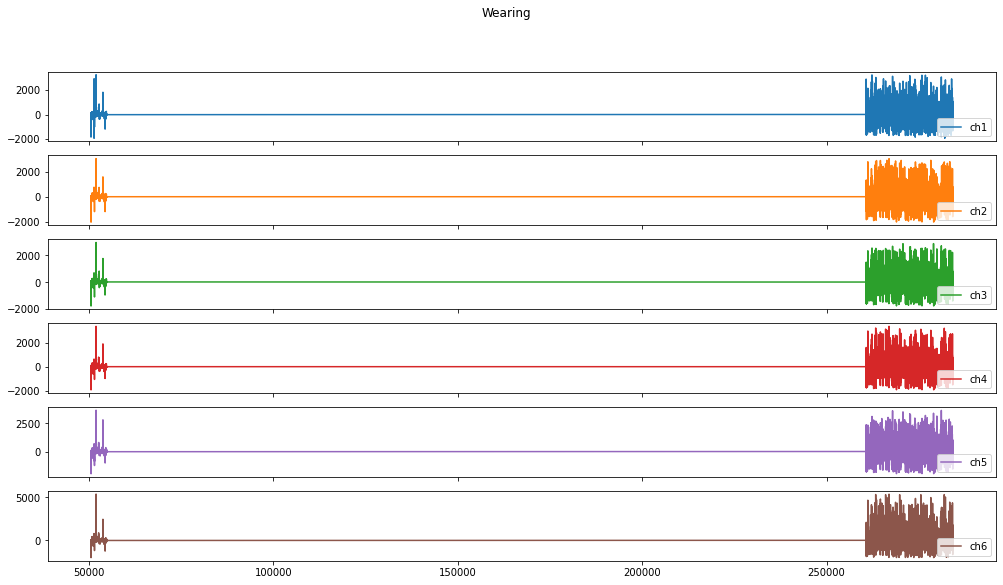

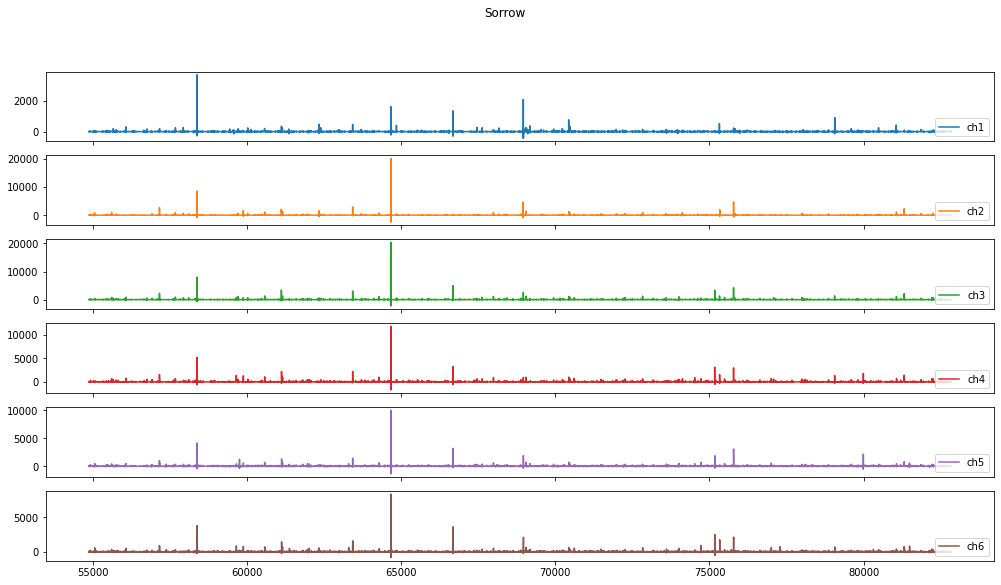

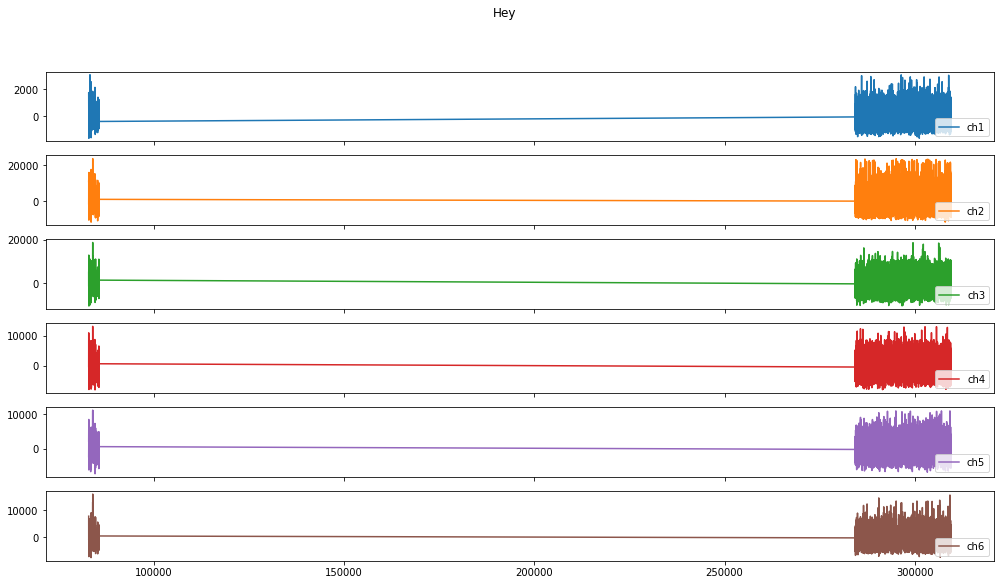

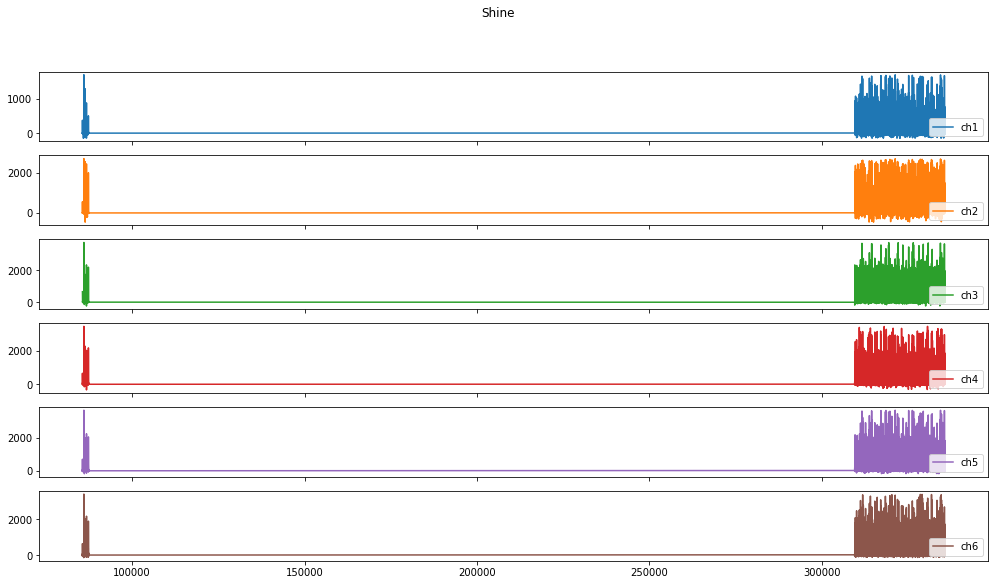

In [37]:
for class_name in classes_list:
  inspect_activity(class_name, df2)

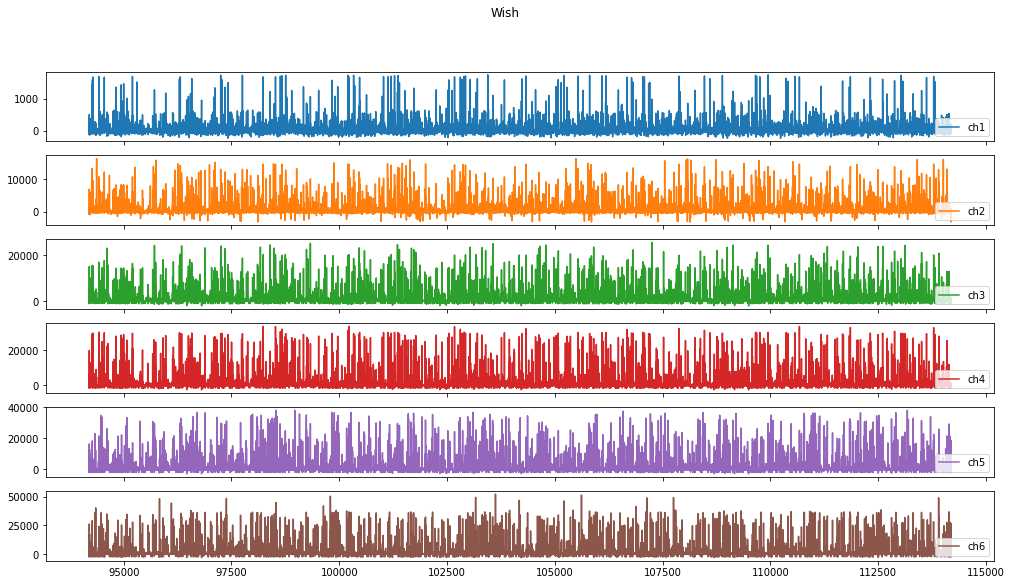

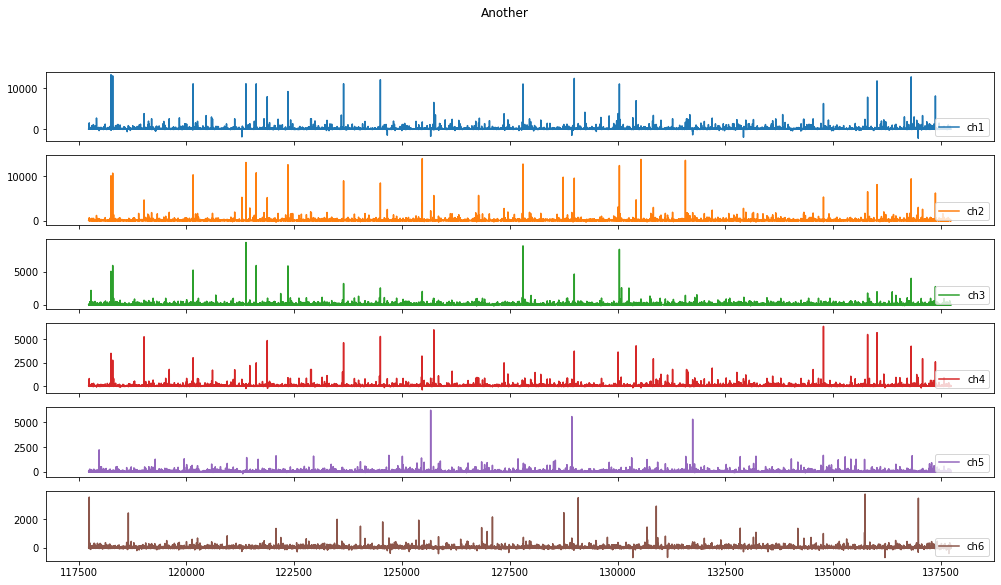

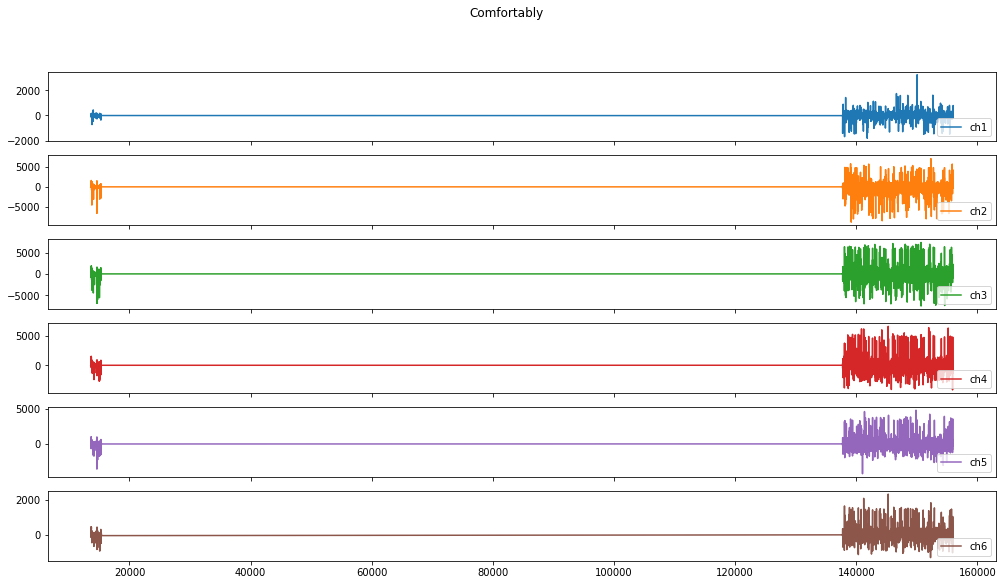

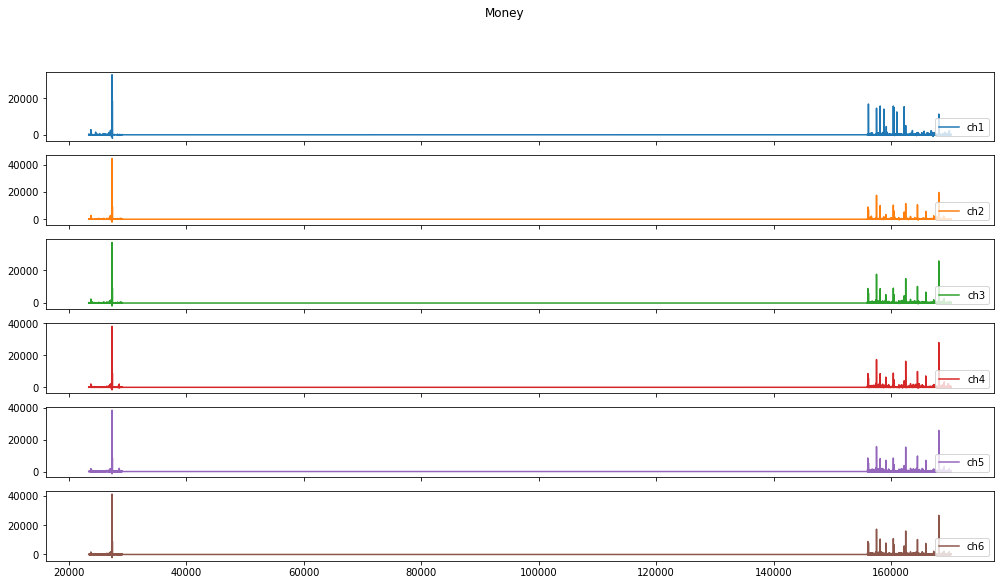

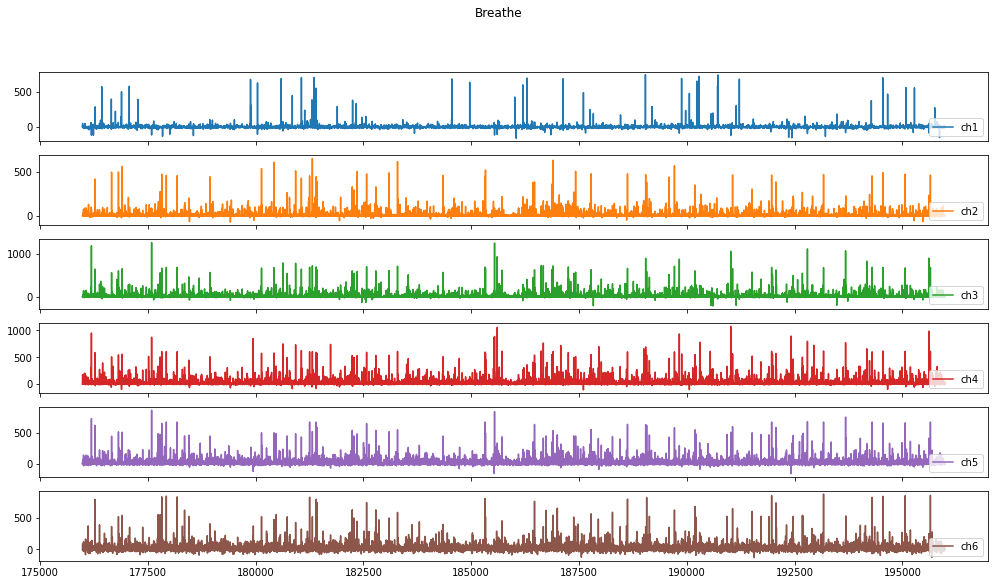

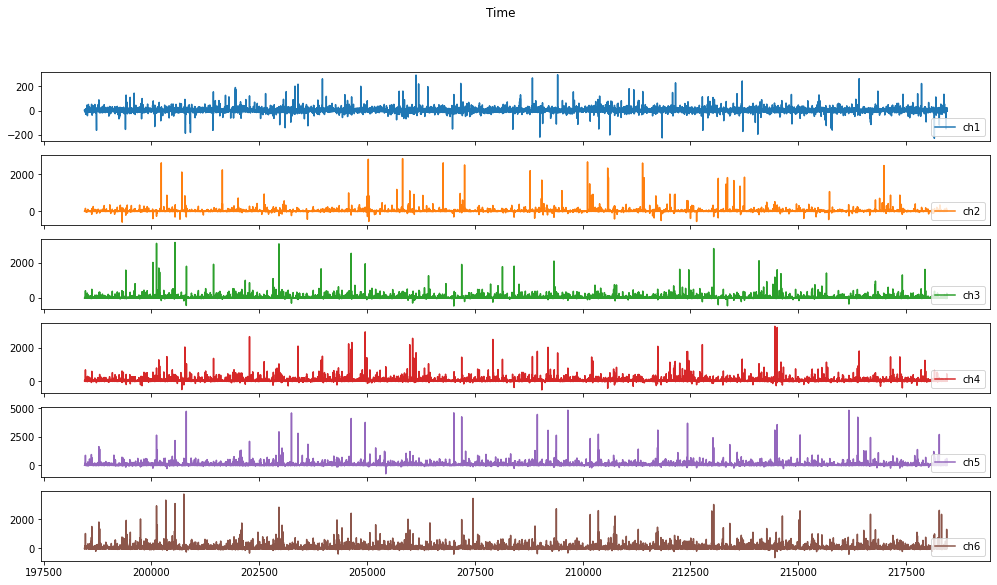

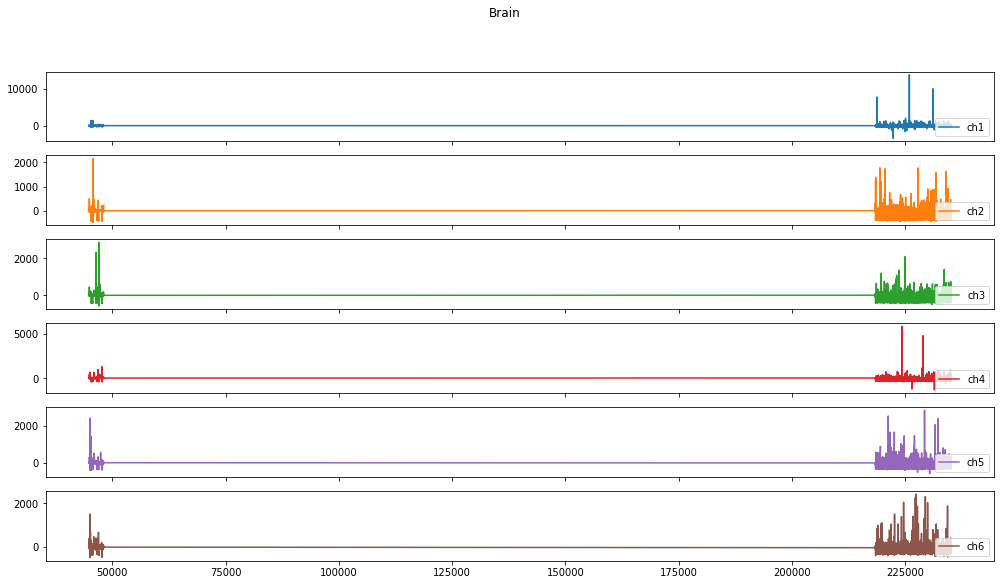

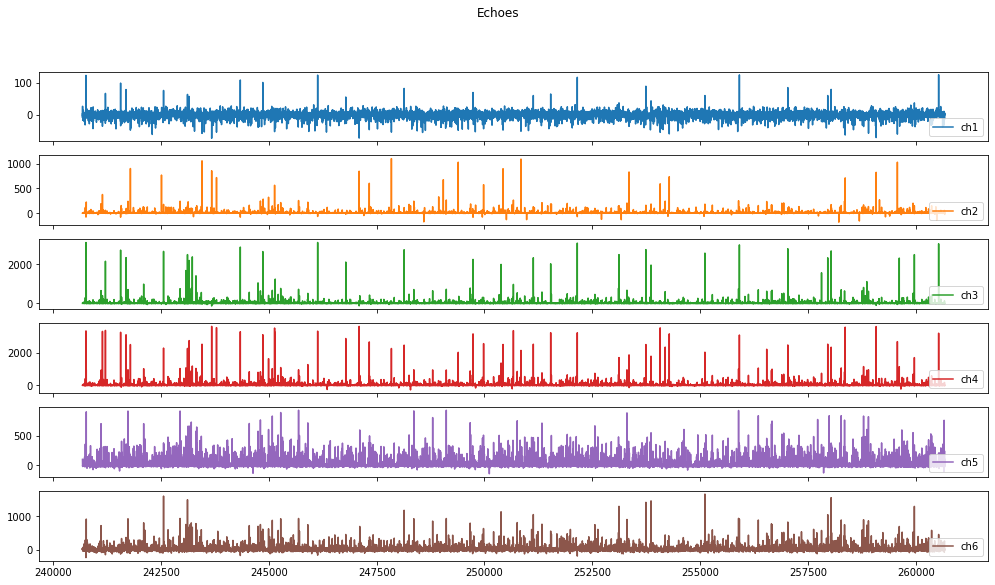

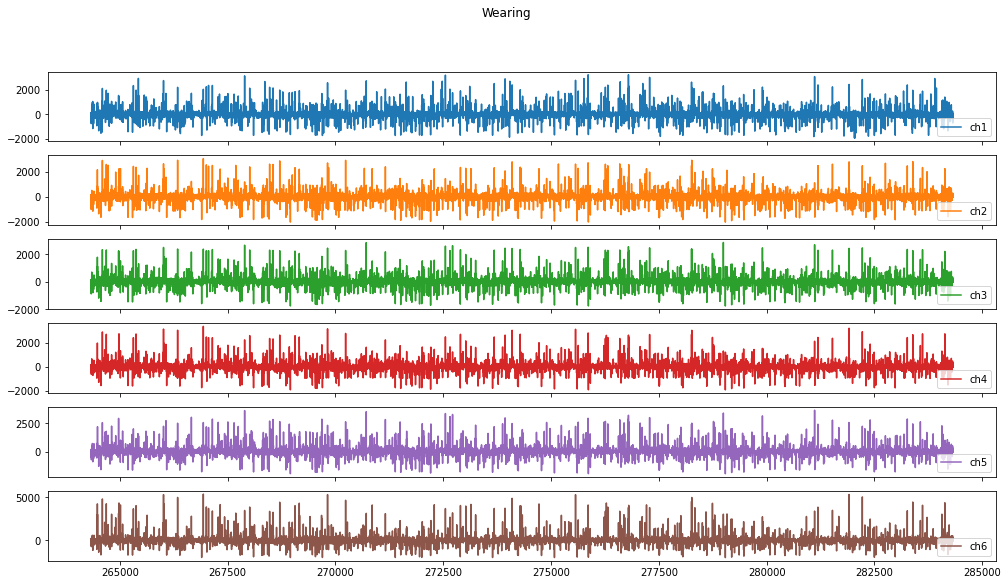

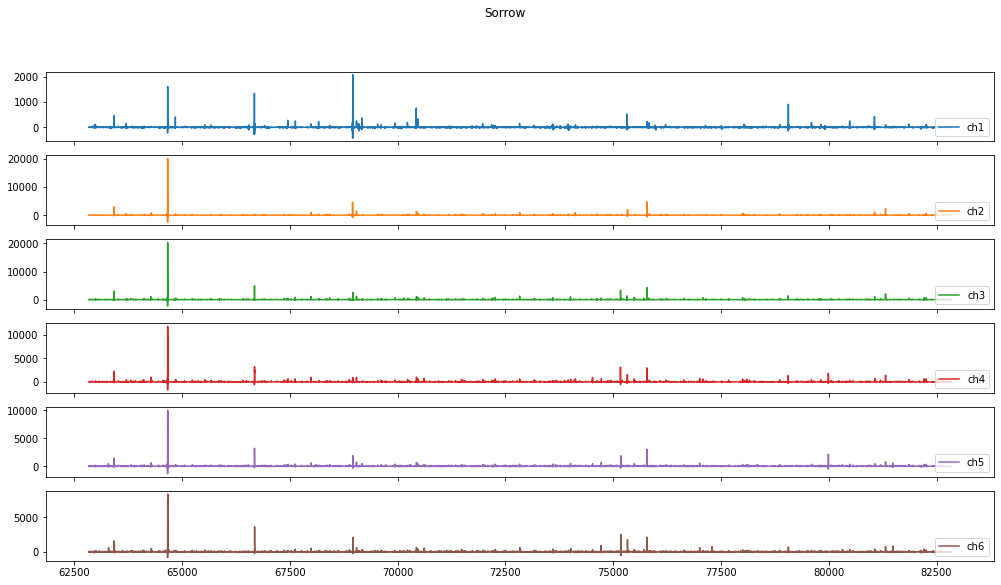

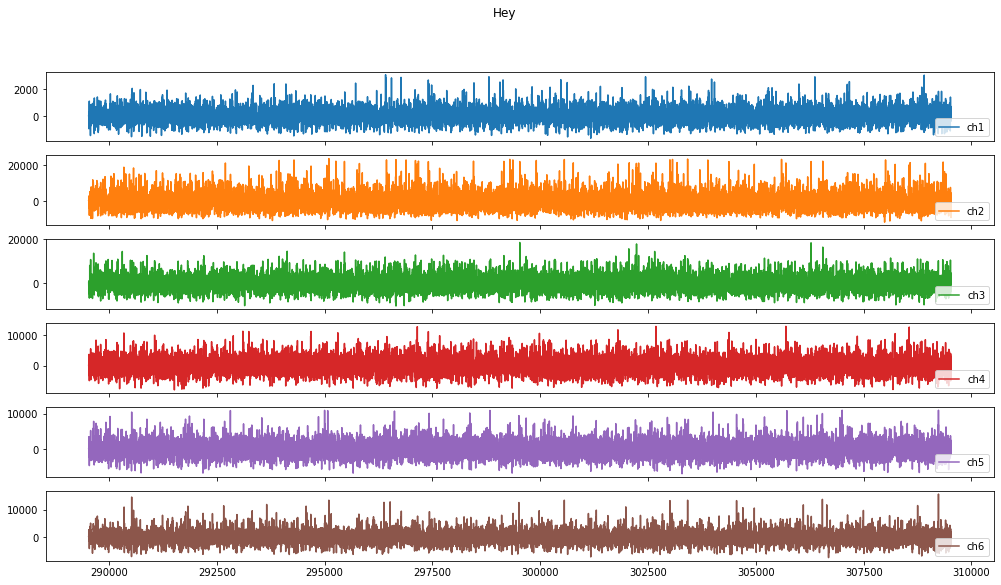

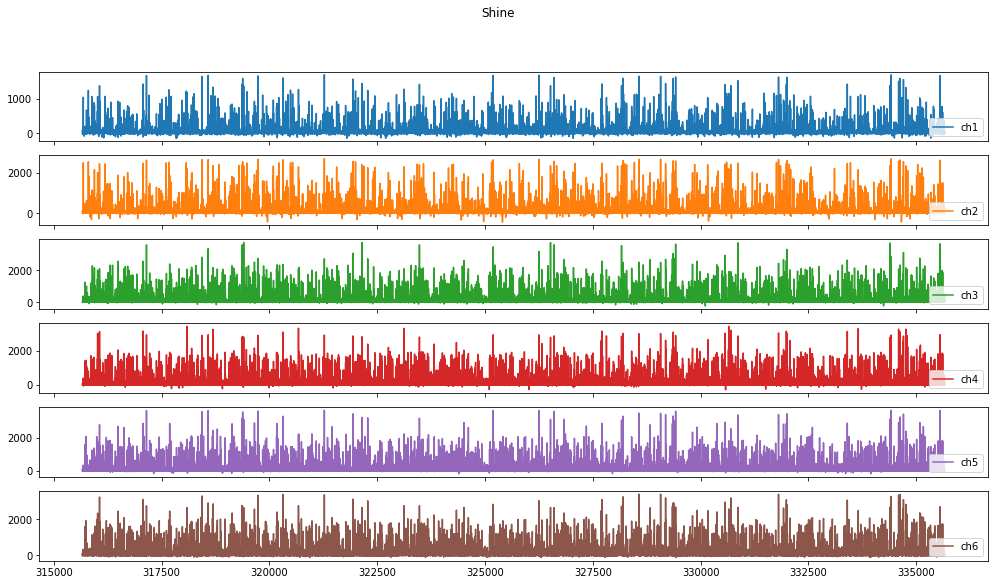

In [47]:
for class_name in classes_list:
  inspect_activity(class_name, df2)

## Split in train e test set

In [ ]:
train_perc = 0.8

#I have to split bwn trai and test the same amount of albels, but the same batch in just one part

#so I'll iterate on the labels
for l in classes_list:
  #then get the number of batches has this label in total
  data = df[df['label'] == l][['batch','label','ch1', 'ch2', 'ch3','ch4','ch5','ch6']]
  maxbatch = data['batch'].max()
  minbatch = data['batch'].min() 
  
  #calculate the number of batches for the train set
  nbatch = maxbatch - minbatch
  train_max_id = minbatch + int(nbatch*train_perc)

  #now slit the dataFrame
  train = data[data['batch'] <= train_max_id][['batch','label','ch1', 'ch2', 'ch3','ch4','ch5','ch6']]
  test = data[data['batch'] > train_max_id][['batch','label','ch1', 'ch2', 'ch3','ch4','ch5','ch6']]

  df_train = df_train.append(train)
  df_test = df_test.append(test)
print(df_train.shape, df_test.shape)

(210996, 8) (53172, 8)


In [52]:
data = df2[df2['label'] == 'Wish'][['batch','label','ch1', 'ch2', 'ch3','ch4','ch5','ch6']]

In [57]:
batch_id = data['batch'].unique()
batch_id[80]

2475

In [73]:
train_perc = 0.8
df_train = pd.DataFrame(columns = ['batch','label', 'ch1', 'ch2', 'ch3', 'ch4', 'ch5', 'ch6'])
df_test = pd.DataFrame(columns = ['batch','label', 'ch1', 'ch2', 'ch3', 'ch4', 'ch5', 'ch6'])

#I have to split bwn trai and test the same amount of albels, but the same batch in just one part

#so I'll iterate on the labels
for l in classes_list:
  #then get the number of batches has this label in total
  data = df2[df2['label'] == l][['batch','label','ch1', 'ch2', 'ch3','ch4','ch5','ch6']]
  batch_id = data['batch'].unique()
  #calculate the number of batches for the train set
  train_size = int(len(batch_id) * train_perc)
  counter = 0
  for id in batch_id:
    #now slit the dataFrame
    if counter <= train_size:
      train = data[data['batch'] == id][['batch','label','ch1', 'ch2', 'ch3','ch4','ch5','ch6']]
      df_train = df_train.append(train)
    else:
      test = data[data['batch'] == id][['batch','label','ch1', 'ch2', 'ch3','ch4','ch5','ch6']]
      df_test = df_test.append(test)
    counter += 1

print(df_train.shape, df_test.shape)

(268704, 8) (66960, 8)


In [74]:
# Training split
training_labels = {
    'Wish': 0,
    'Another': 0,
    'Comfortably': 0,
    'Money': 0,
    'Breathe': 0,
    'Time': 0,
    'Brain' : 0,
    'Echoes' : 0,
    'Wearing' : 0,
    'Sorrow' : 0,
    'Hey' : 0,
    'Shine' : 0
}
# Test split
test_labels = {
    'Wish': 0,
    'Another': 0,
    'Comfortably': 0,
    'Money': 0,
    'Breathe': 0,
    'Time': 0,
    'Brain' : 0,
    'Echoes' : 0,
    'Wearing' : 0,
    'Sorrow' : 0,
    'Hey' : 0,
    'Shine' : 0
}
for id in df_test['batch'].unique():
    label = df_test[df_test['batch'] == id]['label'].values[0]
    test_labels[label] += 1

print('Test labels:',test_labels)

for id in df_train['batch'].unique():
    label = df_train[df_train['batch'] == id]['label'].values[0]
    training_labels[label] += 1

print('Training labels:',training_labels)

Test labels: {'Wish': 155, 'Another': 155, 'Comfortably': 155, 'Money': 155, 'Breathe': 155, 'Time': 155, 'Brain': 155, 'Echoes': 155, 'Wearing': 155, 'Sorrow': 155, 'Hey': 155, 'Shine': 155}
Training labels: {'Wish': 622, 'Another': 622, 'Comfortably': 622, 'Money': 622, 'Breathe': 622, 'Time': 622, 'Brain': 622, 'Echoes': 622, 'Wearing': 622, 'Sorrow': 622, 'Hey': 622, 'Shine': 622}


In [75]:
# Map labels to integers
label_mapping = {
          'Wish': 0,         # 0
          'Another': 1,      # 1
          'Comfortably': 2,  # 2
          'Money': 3,        # 3
          'Breathe': 4,      # 4
          'Time': 5,         # 5
          'Brain': 6,        # 6
          'Echoes': 7,       # 7
          'Wearing': 8,      # 8
          'Sorrow': 9,       # 9
          'Hey': 10,         # 10
          'Shine': 11        #11
}

df_train['label'] = df_train['label'].map(label_mapping)
df_test['label'] = df_test['label'].map(label_mapping)

## Preprocessing

### Normalization

In [61]:
from sklearn.preprocessing import MinMaxScaler

# Apply MinMaxScaler to the useful features
scale_columns = ['ch1', 'ch2', 'ch3','ch4','ch5','ch6']
scaler = MinMaxScaler()
scaler = scaler.fit(df_train[scale_columns])

df_train.loc[:, scale_columns] = scaler.transform(df_train[scale_columns].to_numpy())
df_test.loc[:, scale_columns] = scaler.transform(df_test[scale_columns].to_numpy())

###Standardization

In [76]:
from sklearn.preprocessing import  StandardScaler
import copy

stdtraindata = copy.deepcopy(df_train)
stdtestdata = copy.deepcopy(df_test)
# Apply MinMaxScaler to the useful features
scale_columns = ['ch1', 'ch2', 'ch3', 'ch4', 'ch5', 'ch6']
stdscaler = StandardScaler()
stdscaler = stdscaler.fit(stdtraindata[scale_columns])

stdtraindata.loc[:, scale_columns] = stdscaler.transform(stdtraindata[scale_columns].to_numpy())
stdtestdata.loc[:, scale_columns] = stdscaler.transform(stdtestdata[scale_columns].to_numpy())

In [77]:
df_train.head()

batch  label       ch1      ch2       ch3       ch4      ch5     ch6
0     0      0  17.59700   8.1713  -1.78420 -19.70600  -9.7135 -61.887
1     0      0   0.22974  -5.8956  16.83700   5.03900   2.4332  58.914
2     0      0 -29.65400 -21.2960  29.10300  -0.47503  75.3910  10.665
3     0      0 -59.21000 -29.5650  17.97100 -45.60600  19.4120 -43.014
4     0      0 -72.06400 -25.8550   0.46536 -59.15100 -29.1050 -11.913

## Utils functions

In [78]:
def plot_confusionMatrix(y_test, predictions, label_mapping):
  # Compute the confusion matrix
  cm = confusion_matrix(np.argmax(y_test, axis=-1), np.argmax(predictions, axis=-1))

  # Compute the classification metrics
  accuracy = accuracy_score(np.argmax(y_test, axis=-1), np.argmax(predictions, axis=-1))
  precision = precision_score(np.argmax(y_test, axis=-1), np.argmax(predictions, axis=-1), average='macro')
  recall = recall_score(np.argmax(y_test, axis=-1), np.argmax(predictions, axis=-1), average='macro')
  f1 = f1_score(np.argmax(y_test, axis=-1), np.argmax(predictions, axis=-1), average='macro')
  print('Accuracy:',accuracy.round(4))
  print('Precision:',precision.round(4))
  print('Recall:',recall.round(4))
  print('F1:',f1.round(4))

  # Plot the confusion matrix
  plt.figure(figsize=(10,8))
  sns.heatmap(cm.T, cmap='Blues', xticklabels=list(label_mapping.keys()), yticklabels=list(label_mapping.keys()))
  plt.xlabel('True labels')
  plt.ylabel('Predicted labels')
  plt.show()


Metadata

In [79]:
window = 36
stride = 36

In [65]:
def build_sequences(df, window, stride):
    # Sanity check to avoid runtime errors
    assert window % stride == 0
    dataset = []
    labels = []
    for id in df['batch'].unique():
        # Take only meaningful features
        temp = df[df['batch'] == id][['ch1','ch2','ch3','ch4','ch5','ch6']].values
        # Save the label
        label = df[df['batch'] == id]['label'].values[0]
        # Compute padding length
        padding_len = window - len(temp)%window
        # Create padding and concatenate it
        padding = np.zeros((padding_len,6), dtype='float64')
        temp = np.concatenate((temp,padding))
        # Build features windows with their corresponging labels
        idx = 0
        while idx+window <= len(temp):
            dataset.append(temp[idx:idx+window])
            labels.append(label)
            idx += stride
    dataset = np.array(dataset)
    labels = np.array(labels)
    return dataset, labels

In [80]:
X_train, y_train = build_sequences(df_train, window, stride)
X_test, y_test = build_sequences(df_test, window, stride)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((14928, 36, 6), (14928,), (3720, 36, 6), (3720,))

In [81]:
# Convert the sparse labels to categorical values
y_train = tfk.utils.to_categorical(y_train)
y_test = tfk.utils.to_categorical(y_test)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((14928, 36, 6), (14928, 12), (3720, 36, 6), (3720, 12))

In [82]:
input_shape = X_train.shape[1:]
classes = y_train.shape[-1]
batch_size = 64
epochs = 200

#LSTM

In [69]:
def build_LSTM_classifier(input_shape, classes):
    # Build the neural network layer by layer
    input_layer = tfkl.Input(shape=input_shape, name='Input')

    # Feature extractor
    lstm = tfkl.LSTM(128, return_sequences=True)(input_layer)
    lstm = tfkl.LSTM(128)(lstm)
    dropout = tfkl.Dropout(.5, seed=seed)(lstm)

    # Classifier
    classifier = tfkl.Dense(128, activation='relu')(dropout)
    output_layer = tfkl.Dense(classes, activation='softmax')(classifier)

    # Connect input and output through the Model class
    model = tfk.Model(inputs=input_layer, outputs=output_layer, name='model')

    # Compile the model
    model.compile(loss=tfk.losses.CategoricalCrossentropy(), optimizer=tfk.optimizers.Adam(), metrics='accuracy')

    # Return the model
    return model

In [83]:
model = build_LSTM_classifier(input_shape, classes)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 36, 6)]           0         
                                                                 
 lstm_2 (LSTM)               (None, 36, 128)           69120     
                                                                 
 lstm_3 (LSTM)               (None, 128)               131584    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 12)                1548      
                                                                 
Total params: 218,764
Trainable params: 218,764
Non-trainable

In [84]:
# Train the model
history = model.fit(
    x = X_train,
    y = y_train,
    batch_size = batch_size,
    epochs = epochs,
    validation_split=.1,
    callbacks = [
        tfk.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', patience=10, restore_best_weights=True),
        tfk.callbacks.ReduceLROnPlateau(monitor='val_accuracy', mode='max', patience=5, factor=0.5, min_lr=1e-5)
    ]
).history

Epoch 1/200
210/210 [==============================] - 41s 176ms/step - loss: 1.7731 - accuracy: 0.3560 - val_loss: 6.2210 - val_accuracy: 0.0831 - lr: 0.0010
Epoch 2/200
210/210 [==============================] - 35s 164ms/step - loss: 1.5255 - accuracy: 0.4362 - val_loss: 8.7674 - val_accuracy: 0.0817 - lr: 0.0010
Epoch 3/200
210/210 [==============================] - 35s 166ms/step - loss: 1.4537 - accuracy: 0.4612 - val_loss: 9.4955 - val_accuracy: 0.0784 - lr: 0.0010
Epoch 4/200
210/210 [==============================] - 34s 164ms/step - loss: 1.4160 - accuracy: 0.4693 - val_loss: 10.6509 - val_accuracy: 0.0831 - lr: 0.0010
Epoch 5/200
210/210 [==============================] - 34s 164ms/step - loss: 1.3974 - accuracy: 0.4782 - val_loss: 11.1488 - val_accuracy: 0.0831 - lr: 0.0010
Epoch 6/200
210/210 [==============================] - 37s 174ms/step - loss: 1.3763 - accuracy: 0.4837 - val_loss: 10.9576 - val_accuracy: 0.0831 - lr: 0.0010
Epoch 7/200
210/210 [======================

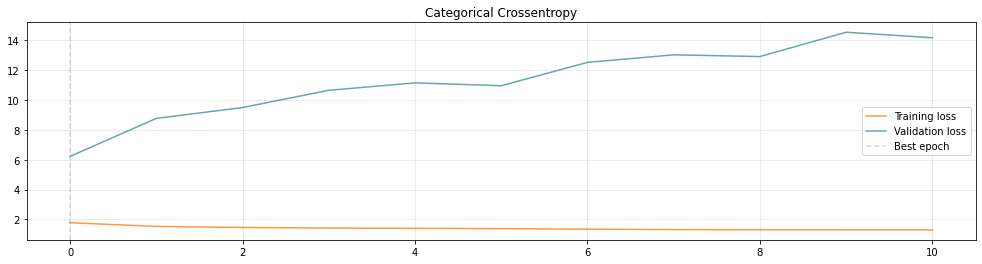

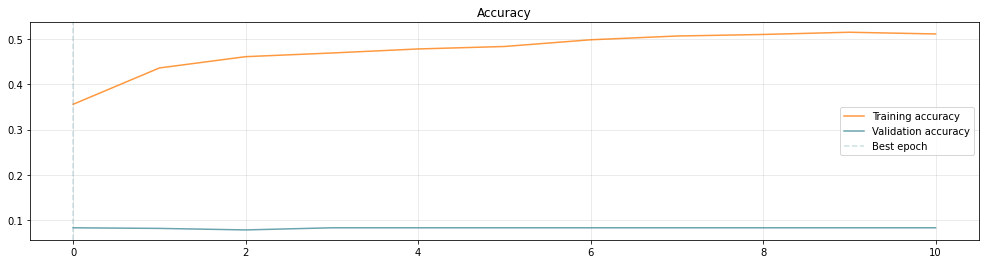

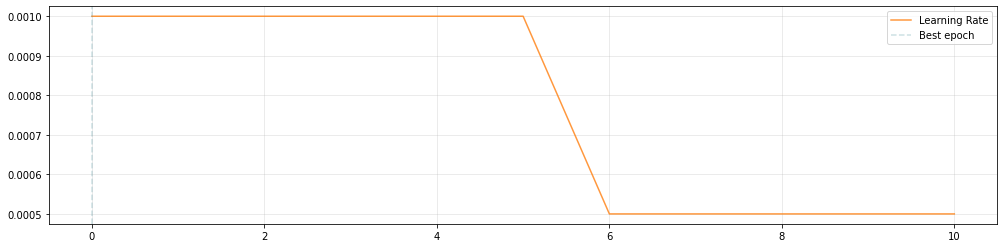

In [85]:
best_epoch = np.argmax(history['val_accuracy'])
plt.figure(figsize=(17,4))
plt.plot(history['loss'], label='Training loss', alpha=.8, color='#ff7f0e')
plt.plot(history['val_loss'], label='Validation loss', alpha=.9, color='#5a9aa5')
plt.axvline(x=best_epoch, label='Best epoch', alpha=.3, ls='--', color='#5a9aa5')
plt.title('Categorical Crossentropy')
plt.legend()
plt.grid(alpha=.3)
plt.show()

plt.figure(figsize=(17,4))
plt.plot(history['accuracy'], label='Training accuracy', alpha=.8, color='#ff7f0e')
plt.plot(history['val_accuracy'], label='Validation accuracy', alpha=.9, color='#5a9aa5')
plt.axvline(x=best_epoch, label='Best epoch', alpha=.3, ls='--', color='#5a9aa5')
plt.title('Accuracy')
plt.legend()
plt.grid(alpha=.3)
plt.show()

plt.figure(figsize=(17,4))
plt.plot(history['lr'], label='Learning Rate', alpha=.8, color='#ff7f0e')
plt.axvline(x=best_epoch, label='Best epoch', alpha=.3, ls='--', color='#5a9aa5')
plt.legend()
plt.grid(alpha=.3)
plt.show()

In [ ]:
# Save best epoch model
model.save("LSTM")

In [86]:
# Predict the test set with the LSTM
predictions = model.predict(X_test)
predictions.shape

117/117 [==============================] - 8s 59ms/step


(3720, 12)

Accuracy: 0.4392
Precision: 0.6809
Recall: 0.4392
F1: 0.4825


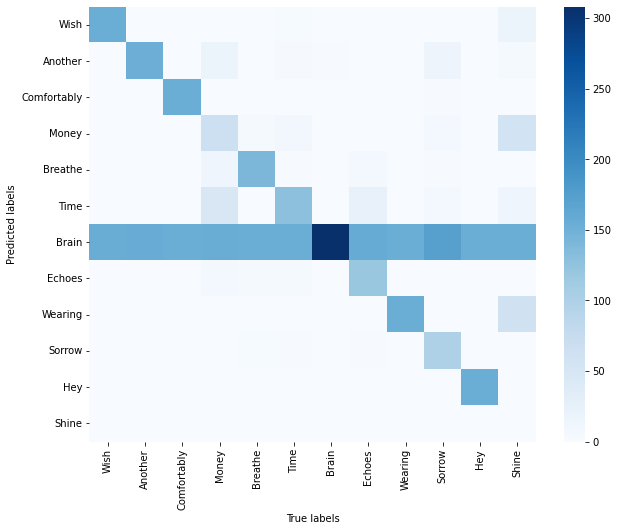

In [87]:
plot_confusionMatrix(y_test, predictions, label_mapping)

#BiLSTM

In [88]:
def build_BiLSTM_classifier(input_shape, classes):
    # Build the neural network layer by layer
    input_layer = tfkl.Input(shape=input_shape, name='Input')

    # Feature extractor
    bilstm = tfkl.Bidirectional(tfkl.LSTM(128, return_sequences=True))(input_layer)
    bilstm = tfkl.Bidirectional(tfkl.LSTM(128))(bilstm)
    dropout = tfkl.Dropout(.5, seed=seed)(bilstm)

    # Classifier
    classifier = tfkl.Dense(128, activation='relu')(dropout)
    output_layer = tfkl.Dense(classes, activation='softmax')(classifier)

    # Connect input and output through the Model class
    model = tfk.Model(inputs=input_layer, outputs=output_layer, name='model')

    # Compile the model
    model.compile(loss=tfk.losses.CategoricalCrossentropy(), optimizer=tfk.optimizers.Adam(), metrics='accuracy')

    # Return the model
    return model

In [89]:
model = build_BiLSTM_classifier(input_shape, classes)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 36, 6)]           0         
                                                                 
 bidirectional (Bidirectiona  (None, 36, 256)          138240    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 256)              394240    
 nal)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dense_5 (Dense)             (None, 12)                1548  

In [90]:
# Train the model
history = model.fit(
    x = X_train,
    y = y_train,
    batch_size = batch_size,
    epochs = epochs,
    validation_split=.1,
    callbacks = [
        tfk.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', patience=10, restore_best_weights=True),
        tfk.callbacks.ReduceLROnPlateau(monitor='val_accuracy', mode='max', patience=5, factor=0.5, min_lr=1e-5)
    ]
).history

Epoch 1/200
210/210 [==============================] - 89s 389ms/step - loss: 1.6784 - accuracy: 0.3892 - val_loss: 9.8455 - val_accuracy: 0.0831 - lr: 0.0010
Epoch 2/200
210/210 [==============================] - 78s 371ms/step - loss: 1.4717 - accuracy: 0.4566 - val_loss: 10.1798 - val_accuracy: 0.0831 - lr: 0.0010
Epoch 3/200
210/210 [==============================] - 79s 376ms/step - loss: 1.4081 - accuracy: 0.4707 - val_loss: 12.1053 - val_accuracy: 0.0831 - lr: 0.0010
Epoch 4/200
210/210 [==============================] - 84s 398ms/step - loss: 1.3847 - accuracy: 0.4812 - val_loss: 12.1863 - val_accuracy: 0.0831 - lr: 0.0010
Epoch 5/200
210/210 [==============================] - 78s 372ms/step - loss: 1.3462 - accuracy: 0.4936 - val_loss: 13.9885 - val_accuracy: 0.0831 - lr: 0.0010
Epoch 6/200
210/210 [==============================] - 76s 362ms/step - loss: 1.3255 - accuracy: 0.5029 - val_loss: 15.7483 - val_accuracy: 0.0831 - lr: 0.0010
Epoch 7/200
210/210 [====================

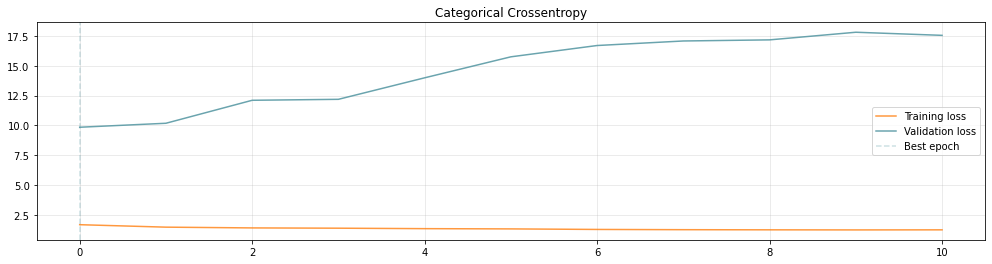

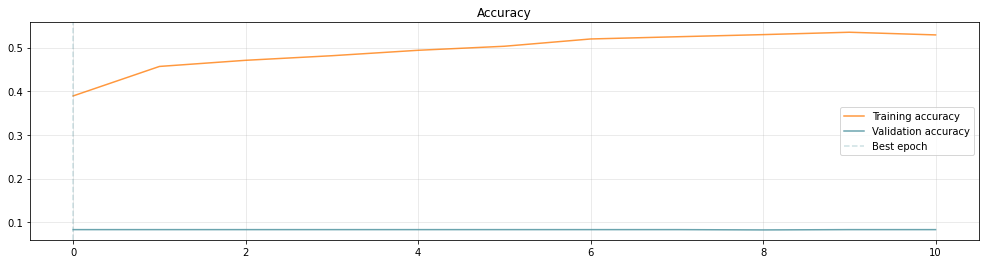

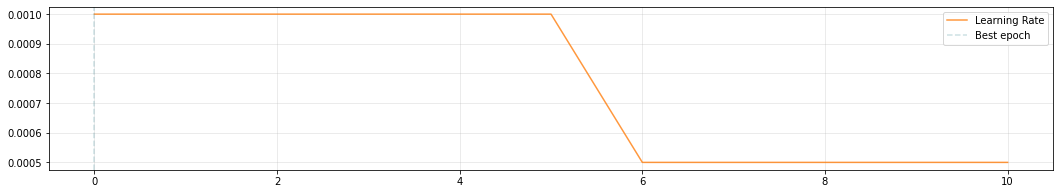

In [91]:
best_epoch = np.argmax(history['val_accuracy'])
plt.figure(figsize=(17,4))
plt.plot(history['loss'], label='Training loss', alpha=.8, color='#ff7f0e')
plt.plot(history['val_loss'], label='Validation loss', alpha=.9, color='#5a9aa5')
plt.axvline(x=best_epoch, label='Best epoch', alpha=.3, ls='--', color='#5a9aa5')
plt.title('Categorical Crossentropy')
plt.legend()
plt.grid(alpha=.3)
plt.show()

plt.figure(figsize=(17,4))
plt.plot(history['accuracy'], label='Training accuracy', alpha=.8, color='#ff7f0e')
plt.plot(history['val_accuracy'], label='Validation accuracy', alpha=.9, color='#5a9aa5')
plt.axvline(x=best_epoch, label='Best epoch', alpha=.3, ls='--', color='#5a9aa5')
plt.title('Accuracy')
plt.legend()
plt.grid(alpha=.3)
plt.show()

plt.figure(figsize=(18,3))
plt.plot(history['lr'], label='Learning Rate', alpha=.8, color='#ff7f0e')
plt.axvline(x=best_epoch, label='Best epoch', alpha=.3, ls='--', color='#5a9aa5')
plt.legend()
plt.grid(alpha=.3)
plt.show()

In [ ]:
model.save('BiLSTM')

In [92]:
# Predict the test set with the BiLSTM
predictions = model.predict(X_test)
predictions.shape

117/117 [==============================] - 11s 77ms/step


(3720, 12)

Accuracy: 0.4492
Precision: 0.7122
Recall: 0.4492
F1: 0.4981


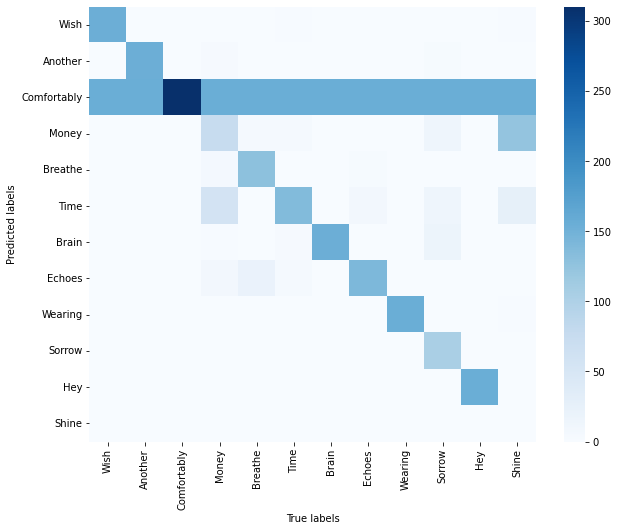

In [93]:
plot_confusionMatrix(y_test, predictions, label_mapping)

#1D CNN

In [94]:
def build_1DCNN_classifier(input_shape, classes):
    # Build the neural network layer by layer
    input_layer = tfkl.Input(shape=input_shape, name='Input')

    # Feature extractor
    cnn = tfkl.Conv1D(128,3,padding='same',activation='relu')(input_layer)
    cnn = tfkl.MaxPooling1D()(cnn)
    cnn = tfkl.Conv1D(128,3,padding='same',activation='relu')(cnn)
    gap = tfkl.GlobalAveragePooling1D()(cnn)
    dropout = tfkl.Dropout(.5, seed=seed)(gap)

    # Classifier
    classifier = tfkl.Dense(128, activation='relu')(dropout)
    output_layer = tfkl.Dense(classes, activation='softmax')(classifier)

    # Connect input and output through the Model class
    model = tfk.Model(inputs=input_layer, outputs=output_layer, name='model')

    # Compile the model
    model.compile(loss=tfk.losses.CategoricalCrossentropy(), optimizer=tfk.optimizers.Adam(), metrics='accuracy')

    # Return the model
    return model

In [95]:
model = build_1DCNN_classifier(input_shape, classes)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 36, 6)]           0         
                                                                 
 conv1d (Conv1D)             (None, 36, 128)           2432      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 18, 128)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 18, 128)           49280     
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dropout_3 (Dropout)         (None, 128)               0     

In [96]:
# Train the model
history = model.fit(
    x = X_train,
    y = y_train,
    batch_size = batch_size,
    epochs = epochs,
    validation_split=.1,
    callbacks = [
        tfk.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', patience=10, restore_best_weights=True),
        tfk.callbacks.ReduceLROnPlateau(monitor='val_accuracy', mode='max', patience=5, factor=0.5, min_lr=1e-5)
    ]
).history

Epoch 1/200
210/210 [==============================] - 5s 20ms/step - loss: 5.5136 - accuracy: 0.1774 - val_loss: 3.5986 - val_accuracy: 0.0831 - lr: 0.0010
Epoch 2/200
210/210 [==============================] - 4s 19ms/step - loss: 2.2346 - accuracy: 0.2409 - val_loss: 5.2626 - val_accuracy: 0.0831 - lr: 0.0010
Epoch 3/200
210/210 [==============================] - 4s 19ms/step - loss: 2.0955 - accuracy: 0.2595 - val_loss: 5.2283 - val_accuracy: 0.0810 - lr: 0.0010
Epoch 4/200
210/210 [==============================] - 6s 28ms/step - loss: 2.0424 - accuracy: 0.2907 - val_loss: 6.0073 - val_accuracy: 0.0831 - lr: 0.0010
Epoch 5/200
210/210 [==============================] - 4s 19ms/step - loss: 2.0508 - accuracy: 0.2890 - val_loss: 6.7677 - val_accuracy: 0.0717 - lr: 0.0010
Epoch 6/200
210/210 [==============================] - 4s 19ms/step - loss: 1.9904 - accuracy: 0.3009 - val_loss: 7.9401 - val_accuracy: 0.0650 - lr: 0.0010
Epoch 7/200
210/210 [==============================] - 4s 

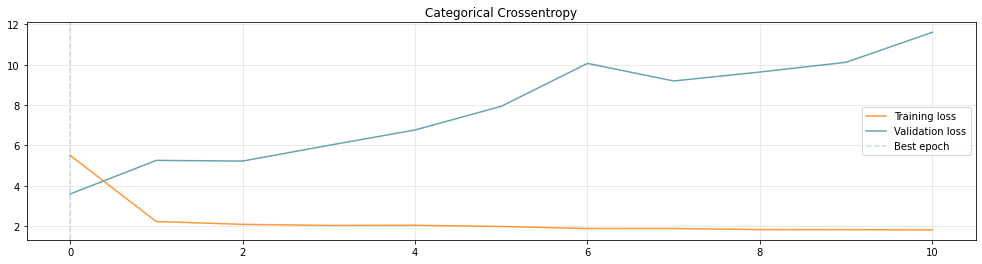

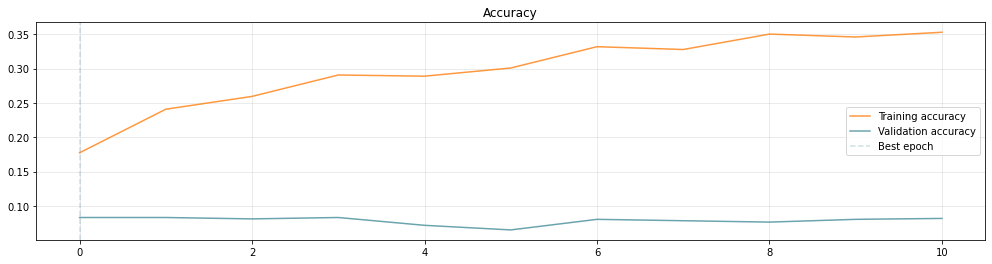

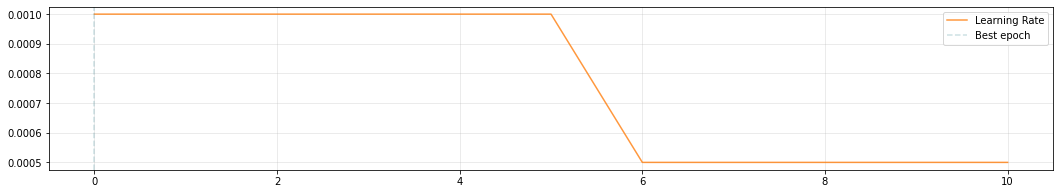

In [97]:
best_epoch = np.argmax(history['val_accuracy'])
plt.figure(figsize=(17,4))
plt.plot(history['loss'], label='Training loss', alpha=.8, color='#ff7f0e')
plt.plot(history['val_loss'], label='Validation loss', alpha=.9, color='#5a9aa5')
plt.axvline(x=best_epoch, label='Best epoch', alpha=.3, ls='--', color='#5a9aa5')
plt.title('Categorical Crossentropy')
plt.legend()
plt.grid(alpha=.3)
plt.show()

plt.figure(figsize=(17,4))
plt.plot(history['accuracy'], label='Training accuracy', alpha=.8, color='#ff7f0e')
plt.plot(history['val_accuracy'], label='Validation accuracy', alpha=.9, color='#5a9aa5')
plt.axvline(x=best_epoch, label='Best epoch', alpha=.3, ls='--', color='#5a9aa5')
plt.title('Accuracy')
plt.legend()
plt.grid(alpha=.3)
plt.show()

plt.figure(figsize=(18,3))
plt.plot(history['lr'], label='Learning Rate', alpha=.8, color='#ff7f0e')
plt.axvline(x=best_epoch, label='Best epoch', alpha=.3, ls='--', color='#5a9aa5')
plt.legend()
plt.grid(alpha=.3)
plt.show()

In [ ]:
model.save('1DCNN')

In [98]:
# Predict the test set with the 1DCNN
predictions = model.predict(X_test)
predictions.shape

117/117 [==============================] - 1s 5ms/step


(3720, 12)

Accuracy: 0.2508
Precision: 0.353
Recall: 0.2508
F1: 0.2389


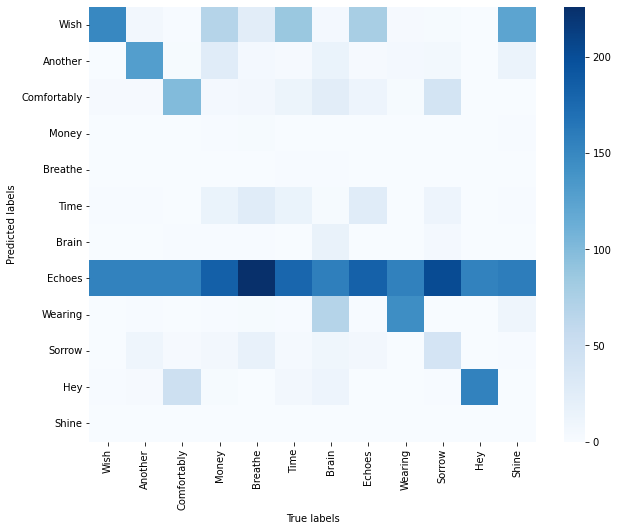

In [99]:
plot_confusionMatrix(y_test, predictions, label_mapping)

#1D VGG

In [100]:
def Conv_1D_Block(x, model_width, kernel):
    # 1D Convolutional Block with BatchNormalization
    x = tf.keras.layers.Conv1D(model_width, kernel, padding='same', kernel_initializer="he_normal")(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation('relu')(x)

    return x

In [101]:
class VGG:
    def __init__(self, length, num_channel, num_filters, problem_type, output_nums=1, dropout_rate=False):
        self.length = length
        self.num_channel = num_channel
        self.num_filters = num_filters
        self.problem_type = problem_type
        self.output_nums = output_nums
        self.dropout_rate = dropout_rate

    def VGG11(self):
        inputs = tf.keras.Input(self.length)  # The input tensor
        # Block 1
        x = Conv_1D_Block(inputs, self.num_filters * (2 ** 0), 3)
        if x.shape[1] <= 2:
            x = tf.keras.layers.MaxPooling1D(pool_size=1, strides=2, padding="valid")(x)
        else:
            x = tf.keras.layers.MaxPooling1D(pool_size=2, strides=2, padding="valid")(x)

        # Block 2
        x = Conv_1D_Block(x, self.num_filters * (2 ** 1), 3)
        if x.shape[1] <= 2:
            x = tf.keras.layers.MaxPooling1D(pool_size=1, strides=2, padding="valid")(x)
        else:
            x = tf.keras.layers.MaxPooling1D(pool_size=2, strides=2, padding="valid")(x)

        # Block 3
        x = Conv_1D_Block(x, self.num_filters * (2 ** 2), 3)
        x = Conv_1D_Block(x, self.num_filters * (2 ** 2), 3)
        if x.shape[1] <= 2:
            x = tf.keras.layers.MaxPooling1D(pool_size=1, strides=2, padding="valid")(x)
        else:
            x = tf.keras.layers.MaxPooling1D(pool_size=2, strides=2, padding="valid")(x)

        # Block 4
        x = Conv_1D_Block(x, self.num_filters * (2 ** 3), 3)
        x = Conv_1D_Block(x, self.num_filters * (2 ** 3), 3)
        if x.shape[1] <= 2:
            x = tf.keras.layers.MaxPooling1D(pool_size=1, strides=2, padding="valid")(x)
        else:
            x = tf.keras.layers.MaxPooling1D(pool_size=2, strides=2, padding="valid")(x)

        # Block 5
        x = Conv_1D_Block(x, self.num_filters * (2 ** 3), 3)
        x = Conv_1D_Block(x, self.num_filters * (2 ** 3), 3)
        if x.shape[1] <= 2:
            x = tf.keras.layers.MaxPooling1D(pool_size=1, strides=2, padding="valid")(x)
        else:
            x = tf.keras.layers.MaxPooling1D(pool_size=2, strides=2, padding="valid")(x)

        # Fully Connected (MLP) block
        x = tf.keras.layers.Flatten(name='flatten')(x)
        x = tf.keras.layers.Dense(4096, activation='relu')(x)
        x = tf.keras.layers.Dense(4096, activation='relu')(x)
        if self.dropout_rate:
            x = tf.keras.layers.Dropout(self.dropout_rate, name='Dropout')(x)
        outputs = tf.keras.layers.Dense(self.output_nums, activation='linear')(x)
        if self.problem_type == 'Classification':
            outputs = tf.keras.layers.Dense(self.output_nums, activation='softmax')(x)

        # Create model.
        model = tf.keras.Model(inputs=inputs, outputs=outputs)

        return model

    def VGG13(self):
        inputs = tf.keras.Input((self.length, self.num_channel))  # The input tensor
        # Block 1
        x = Conv_1D_Block(inputs, self.num_filters * (2 ** 0), 3)
        x = Conv_1D_Block(x, self.num_filters * (2 ** 0), 3)
        if x.shape[1] <= 2:
            x = tf.keras.layers.MaxPooling1D(pool_size=1, strides=2, padding="valid")(x)
        else:
            x = tf.keras.layers.MaxPooling1D(pool_size=2, strides=2, padding="valid")(x)

        # Block 2
        x = Conv_1D_Block(x, self.num_filters * (2 ** 1), 3)
        x = Conv_1D_Block(x, self.num_filters * (2 ** 1), 3)
        if x.shape[1] <= 2:
            x = tf.keras.layers.MaxPooling1D(pool_size=1, strides=2, padding="valid")(x)
        else:
            x = tf.keras.layers.MaxPooling1D(pool_size=2, strides=2, padding="valid")(x)

        # Block 3
        x = Conv_1D_Block(x, self.num_filters * (2 ** 2), 3)
        x = Conv_1D_Block(x, self.num_filters * (2 ** 2), 3)
        if x.shape[1] <= 2:
            x = tf.keras.layers.MaxPooling1D(pool_size=1, strides=2, padding="valid")(x)
        else:
            x = tf.keras.layers.MaxPooling1D(pool_size=2, strides=2, padding="valid")(x)

        # Block 4
        x = Conv_1D_Block(x, self.num_filters * (2 ** 3), 3)
        x = Conv_1D_Block(x, self.num_filters * (2 ** 3), 3)
        if x.shape[1] <= 2:
            x = tf.keras.layers.MaxPooling1D(pool_size=1, strides=2, padding="valid")(x)
        else:
            x = tf.keras.layers.MaxPooling1D(pool_size=2, strides=2, padding="valid")(x)

        # Block 5
        x = Conv_1D_Block(x, self.num_filters * (2 ** 3), 3)
        x = Conv_1D_Block(x, self.num_filters * (2 ** 3), 3)
        if x.shape[1] <= 2:
            x = tf.keras.layers.MaxPooling1D(pool_size=1, strides=2, padding="valid")(x)
        else:
            x = tf.keras.layers.MaxPooling1D(pool_size=2, strides=2, padding="valid")(x)

        # Fully Connected (MLP) block
        x = tf.keras.layers.Flatten(name='flatten')(x)
        x = tf.keras.layers.Dense(4096, activation='relu')(x)
        x = tf.keras.layers.Dense(4096, activation='relu')(x)
        if self.dropout_rate:
            x = tf.keras.layers.Dropout(self.dropout_rate, name='Dropout')(x)
        outputs = tf.keras.layers.Dense(self.output_nums, activation='linear')(x)
        if self.problem_type == 'Classification':
            outputs = tf.keras.layers.Dense(self.output_nums, activation='softmax')(x)

        # Create model.
        model = tf.keras.Model(inputs=inputs, outputs=outputs)

        return model

    def VGG16(self):
        inputs = tf.keras.Input(self.length)  # The input tensor
        # Block 1
        x = Conv_1D_Block(inputs, self.num_filters * (2 ** 0), 3)
        x = Conv_1D_Block(x, self.num_filters * (2 ** 0), 3)
        if x.shape[1] <= 2:
            x = tf.keras.layers.MaxPooling1D(pool_size=1, strides=2, padding="valid")(x)
        else:
            x = tf.keras.layers.MaxPooling1D(pool_size=2, strides=2, padding="valid")(x)

        # Block 2
        x = Conv_1D_Block(x, self.num_filters * (2 ** 1), 3)
        x = Conv_1D_Block(x, self.num_filters * (2 ** 1), 3)
        if x.shape[1] <= 2:
            x = tf.keras.layers.MaxPooling1D(pool_size=1, strides=2, padding="valid")(x)
        else:
            x = tf.keras.layers.MaxPooling1D(pool_size=2, strides=2, padding="valid")(x)

        # Block 3
        x = Conv_1D_Block(x, self.num_filters * (2 ** 2), 3)
        x = Conv_1D_Block(x, self.num_filters * (2 ** 2), 3)
        x = Conv_1D_Block(x, self.num_filters * (2 ** 2), 3)
        if x.shape[1] <= 2:
            x = tf.keras.layers.MaxPooling1D(pool_size=1, strides=2, padding="valid")(x)
        else:
            x = tf.keras.layers.MaxPooling1D(pool_size=2, strides=2, padding="valid")(x)

        # Block 4
        x = Conv_1D_Block(x, self.num_filters * (2 ** 3), 3)
        x = Conv_1D_Block(x, self.num_filters * (2 ** 3), 3)
        x = Conv_1D_Block(x, self.num_filters * (2 ** 3), 3)
        if x.shape[1] <= 2:
            x = tf.keras.layers.MaxPooling1D(pool_size=1, strides=2, padding="valid")(x)
        else:
            x = tf.keras.layers.MaxPooling1D(pool_size=2, strides=2, padding="valid")(x)

        # Block 5
        x = Conv_1D_Block(x, self.num_filters * (2 ** 3), 3)
        x = Conv_1D_Block(x, self.num_filters * (2 ** 3), 3)
        x = Conv_1D_Block(x, self.num_filters * (2 ** 3), 3)
        if x.shape[1] <= 2:
            x = tf.keras.layers.MaxPooling1D(pool_size=1, strides=2, padding="valid")(x)
        else:
            x = tf.keras.layers.MaxPooling1D(pool_size=2, strides=2, padding="valid")(x)

        # Fully Connected (MLP) block
        x = tf.keras.layers.Flatten(name='flatten')(x)
        x = tf.keras.layers.Dense(4096, activation='relu')(x)
        x = tf.keras.layers.Dense(4096, activation='relu')(x)
        if self.dropout_rate:
            x = tf.keras.layers.Dropout(self.dropout_rate, name='Dropout')(x)
        outputs = tf.keras.layers.Dense(self.output_nums, activation='linear')(x)
        if self.problem_type == 'Classification':
            outputs = tf.keras.layers.Dense(self.output_nums, activation='softmax')(x)

        # Create model.
        model = tf.keras.Model(inputs=inputs, outputs=outputs)

        return model

    def VGG16_v2(self):
        inputs = tf.keras.Input((self.length, self.num_channel))  # The input tensor
        # Block 1
        x = Conv_1D_Block(inputs, self.num_filters * (2 ** 0), 3)
        x = Conv_1D_Block(x, self.num_filters * (2 ** 0), 3)
        if x.shape[1] <= 2:
            x = tf.keras.layers.MaxPooling1D(pool_size=1, strides=2, padding="valid")(x)
        else:
            x = tf.keras.layers.MaxPooling1D(pool_size=2, strides=2, padding="valid")(x)

        # Block 2
        x = Conv_1D_Block(x, self.num_filters * (2 ** 1), 3)
        x = Conv_1D_Block(x, self.num_filters * (2 ** 1), 3)
        if x.shape[1] <= 2:
            x = tf.keras.layers.MaxPooling1D(pool_size=1, strides=2, padding="valid")(x)
        else:
            x = tf.keras.layers.MaxPooling1D(pool_size=2, strides=2, padding="valid")(x)

        # Block 3
        x = Conv_1D_Block(x, self.num_filters * (2 ** 2), 3)
        x = Conv_1D_Block(x, self.num_filters * (2 ** 2), 3)
        x = Conv_1D_Block(x, self.num_filters * (2 ** 2), 1)
        if x.shape[1] <= 2:
            x = tf.keras.layers.MaxPooling1D(pool_size=1, strides=2, padding="valid")(x)
        else:
            x = tf.keras.layers.MaxPooling1D(pool_size=2, strides=2, padding="valid")(x)

        # Block 4
        x = Conv_1D_Block(x, self.num_filters * (2 ** 3), 3)
        x = Conv_1D_Block(x, self.num_filters * (2 ** 3), 3)
        x = Conv_1D_Block(x, self.num_filters * (2 ** 3), 1)
        if x.shape[1] <= 2:
            x = tf.keras.layers.MaxPooling1D(pool_size=1, strides=2, padding="valid")(x)
        else:
            x = tf.keras.layers.MaxPooling1D(pool_size=2, strides=2, padding="valid")(x)

        # Block 5
        x = Conv_1D_Block(x, self.num_filters * (2 ** 3), 3)
        x = Conv_1D_Block(x, self.num_filters * (2 ** 3), 3)
        x = Conv_1D_Block(x, self.num_filters * (2 ** 3), 1)
        if x.shape[1] <= 2:
            x = tf.keras.layers.MaxPooling1D(pool_size=1, strides=2, padding="valid")(x)
        else:
            x = tf.keras.layers.MaxPooling1D(pool_size=2, strides=2, padding="valid")(x)

        # Fully Connected (MLP) block
        x = tf.keras.layers.Flatten(name='flatten')(x)
        x = tf.keras.layers.Dense(4096, activation='relu')(x)
        x = tf.keras.layers.Dense(4096, activation='relu')(x)
        if self.dropout_rate:
            x = tf.keras.layers.Dropout(self.dropout_rate, name='Dropout')(x)
        outputs = tf.keras.layers.Dense(self.output_nums, activation='linear')(x)
        if self.problem_type == 'Classification':
            outputs = tf.keras.layers.Dense(self.output_nums, activation='softmax')(x)

        # Create model.
        model = tf.keras.Model(inputs=inputs, outputs=outputs)

        return model

    def VGG19(self):
        inputs = tf.keras.Input((self.length, self.num_channel))  # The input tensor
        # Block 1
        x = Conv_1D_Block(inputs, self.num_filters * (2 ** 0), 3)
        x = Conv_1D_Block(x, self.num_filters * (2 ** 0), 3)
        if x.shape[1] <= 2:
            x = tf.keras.layers.MaxPooling1D(pool_size=1, strides=2, padding="valid")(x)
        else:
            x = tf.keras.layers.MaxPooling1D(pool_size=2, strides=2, padding="valid")(x)

        # Block 2
        x = Conv_1D_Block(x, self.num_filters * (2 ** 1), 3)
        x = Conv_1D_Block(x, self.num_filters * (2 ** 1), 3)
        if x.shape[1] <= 2:
            x = tf.keras.layers.MaxPooling1D(pool_size=1, strides=2, padding="valid")(x)
        else:
            x = tf.keras.layers.MaxPooling1D(pool_size=2, strides=2, padding="valid")(x)

        # Block 3
        x = Conv_1D_Block(x, self.num_filters * (2 ** 2), 3)
        x = Conv_1D_Block(x, self.num_filters * (2 ** 2), 3)
        x = Conv_1D_Block(x, self.num_filters * (2 ** 2), 3)
        x = Conv_1D_Block(x, self.num_filters * (2 ** 2), 3)
        if x.shape[1] <= 2:
            x = tf.keras.layers.MaxPooling1D(pool_size=1, strides=2, padding="valid")(x)
        else:
            x = tf.keras.layers.MaxPooling1D(pool_size=2, strides=2, padding="valid")(x)

        # Block 4
        x = Conv_1D_Block(x, self.num_filters * (2 ** 3), 3)
        x = Conv_1D_Block(x, self.num_filters * (2 ** 3), 3)
        x = Conv_1D_Block(x, self.num_filters * (2 ** 3), 3)
        x = Conv_1D_Block(x, self.num_filters * (2 ** 3), 3)
        if x.shape[1] <= 2:
            x = tf.keras.layers.MaxPooling1D(pool_size=1, strides=2, padding="valid")(x)
        else:
            x = tf.keras.layers.MaxPooling1D(pool_size=2, strides=2, padding="valid")(x)

        # Block 5
        x = Conv_1D_Block(x, self.num_filters * (2 ** 3), 3)
        x = Conv_1D_Block(x, self.num_filters * (2 ** 3), 3)
        x = Conv_1D_Block(x, self.num_filters * (2 ** 3), 3)
        x = Conv_1D_Block(x, self.num_filters * (2 ** 3), 3)
        if x.shape[1] <= 2:
            x = tf.keras.layers.MaxPooling1D(pool_size=1, strides=2, padding="valid")(x)
        else:
            x = tf.keras.layers.MaxPooling1D(pool_size=2, strides=2, padding="valid")(x)

        # Fully Connected (MLP) block
        x = tf.keras.layers.Flatten(name='flatten')(x)
        x = tf.keras.layers.Dense(4096, activation='relu')(x)
        x = tf.keras.layers.Dense(4096, activation='relu')(x)
        if self.dropout_rate:
            x = tf.keras.layers.Dropout(self.dropout_rate, name='Dropout')(x)
        outputs = tf.keras.layers.Dense(self.output_nums, activation='linear')(x)
        if self.problem_type == 'Classification':
            outputs = tf.keras.layers.Dense(self.output_nums, activation='softmax')(x)

        # Create model.
        model = tf.keras.Model(inputs=inputs, outputs=outputs)

        return model

In [102]:
length = X_train.shape[1:]       # Number of Features (or length of the signal)
model_width = 32                # Number of Filter or Kernels in the Input Layer
num_channel = 1                 # Number of Input Channels
problem_type = 'Classification' # Regression or Classification
class_number = y_train.shape[-1] # Number of Output Class in Classification Mode (>=2)


In [103]:
Classification_Model = VGG(length, num_channel, model_width, problem_type=problem_type, output_nums=class_number).VGG16() # Change the VGG Model if needed
if class_number == 2:
  Classification_Model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['mse','accuracy'])
elif class_number > 2:
  Classification_Model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['mse','accuracy'])

In [104]:
Classification_Model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 36, 6)]           0         
                                                                 
 conv1d_2 (Conv1D)           (None, 36, 32)            608       
                                                                 
 batch_normalization (BatchN  (None, 36, 32)           128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 36, 32)            0         
                                                                 
 conv1d_3 (Conv1D)           (None, 36, 32)            3104      
                                                                 
 batch_normalization_1 (Batc  (None, 36, 32)           128       
 hNormalization)                                             

In [105]:
# Train the model
history = Classification_Model.fit(
    x = X_train,
    y = y_train,
    batch_size = batch_size,
    epochs = epochs,
    validation_split=.1,
    callbacks = [
        tfk.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', patience=10, restore_best_weights=True),
        tfk.callbacks.ReduceLROnPlateau(monitor='val_accuracy', mode='max', patience=5, factor=0.5, min_lr=1e-5)
    ]
).history

Epoch 1/200
210/210 [==============================] - 103s 471ms/step - loss: 2.1439 - mse: 0.0697 - accuracy: 0.2167 - val_loss: 12.4664 - val_mse: 0.0978 - val_accuracy: 0.0831 - lr: 0.0010
Epoch 2/200
210/210 [==============================] - 106s 503ms/step - loss: 1.9286 - mse: 0.0645 - accuracy: 0.2743 - val_loss: 14.5288 - val_mse: 0.1001 - val_accuracy: 0.0630 - lr: 0.0010
Epoch 3/200
210/210 [==============================] - 99s 472ms/step - loss: 1.8391 - mse: 0.0620 - accuracy: 0.3079 - val_loss: 13.3304 - val_mse: 0.1044 - val_accuracy: 0.0033 - lr: 0.0010
Epoch 4/200
210/210 [==============================] - 99s 473ms/step - loss: 1.7974 - mse: 0.0606 - accuracy: 0.3267 - val_loss: 11.7856 - val_mse: 0.0997 - val_accuracy: 0.0831 - lr: 0.0010
Epoch 5/200
210/210 [==============================] - 98s 464ms/step - loss: 1.7525 - mse: 0.0593 - accuracy: 0.3373 - val_loss: 13.5604 - val_mse: 0.1005 - val_accuracy: 0.0757 - lr: 0.0010
Epoch 6/200
210/210 [=================

In [106]:
# Predict the test set with the 1DCNN
predictions = Classification_Model.predict(X_test)
predictions.shape

117/117 [==============================] - 6s 51ms/step


(3720, 12)

Accuracy: 0.2398
Precision: 0.3227
Recall: 0.2398
F1: 0.2092


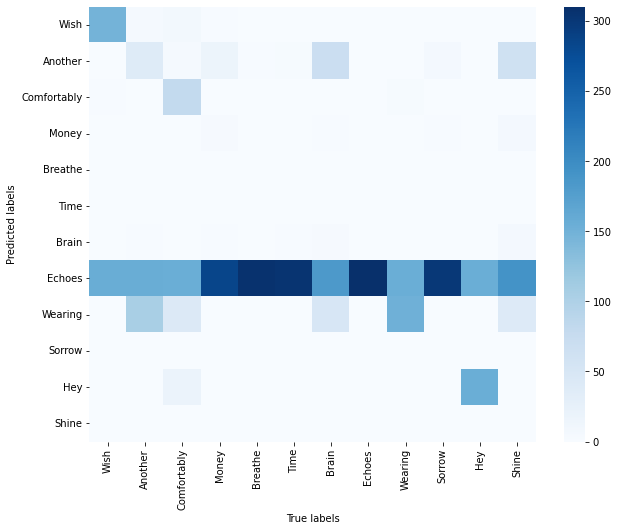

In [107]:
plot_confusionMatrix(y_test, predictions, label_mapping)

#1d ResNet

In [ ]:
class Classifier_RESNET:

    def __init__(self, output_directory, input_shape, nb_classes, verbose=False, build=True, load_weights=False):
        self.output_directory = output_directory
        if build == True:
            self.model = self.build_model(input_shape, nb_classes)
            if (verbose == True):
                self.model.summary()
            self.verbose = verbose
            if load_weights == True:
                self.model.load_weights(self.output_directory
                                        .replace('resnet_augment', 'resnet')
                                        .replace('TSC_itr_augment_x_10', 'TSC_itr_10')
                                        + '/model_init.hdf5')
            else:
                self.model.save_weights(self.output_directory + 'model_init.hdf5')
        return

    def build_model(self, input_shape, nb_classes):
        n_feature_maps = 64

        input_layer = tf.keras.layers.Input(input_shape)

        # BLOCK 1

        conv_x = tf.keras.layers.Conv1D(filters=n_feature_maps, kernel_size=8, padding='same')(input_layer)
        conv_x = tf.keras.layers.BatchNormalization()(conv_x)
        conv_x = tf.keras.layers.Activation('relu')(conv_x)

        conv_y = tf.keras.layers.Conv1D(filters=n_feature_maps, kernel_size=5, padding='same')(conv_x)
        conv_y = tf.keras.layers.BatchNormalization()(conv_y)
        conv_y = tf.keras.layers.Activation('relu')(conv_y)

        conv_z = tf.keras.layers.Conv1D(filters=n_feature_maps, kernel_size=3, padding='same')(conv_y)
        conv_z = tf.keras.layers.BatchNormalization()(conv_z)

        # expand channels for the sum
        shortcut_y = tf.keras.layers.Conv1D(filters=n_feature_maps, kernel_size=1, padding='same')(input_layer)
        shortcut_y = tf.keras.layers.BatchNormalization()(shortcut_y)

        output_block_1 = tf.keras.layers.add([shortcut_y, conv_z])
        output_block_1 = tf.keras.layers.Activation('relu')(output_block_1)

        # BLOCK 2

        conv_x = tf.keras.layers.Conv1D(filters=n_feature_maps * 2, kernel_size=8, padding='same')(output_block_1)
        conv_x = tf.keras.layers.BatchNormalization()(conv_x)
        conv_x = tf.keras.layers.Activation('relu')(conv_x)

        conv_y = tf.keras.layers.Conv1D(filters=n_feature_maps * 2, kernel_size=5, padding='same')(conv_x)
        conv_y = tf.keras.layers.BatchNormalization()(conv_y)
        conv_y = tf.keras.layers.Activation('relu')(conv_y)

        conv_z = tf.keras.layers.Conv1D(filters=n_feature_maps * 2, kernel_size=3, padding='same')(conv_y)
        conv_z = tf.keras.layers.BatchNormalization()(conv_z)

        # expand channels for the sum
        shortcut_y = tf.keras.layers.Conv1D(filters=n_feature_maps * 2, kernel_size=1, padding='same')(output_block_1)
        shortcut_y = tf.keras.layers.BatchNormalization()(shortcut_y)

        output_block_2 = tf.keras.layers.add([shortcut_y, conv_z])
        output_block_2 = tf.keras.layers.Activation('relu')(output_block_2)

        # BLOCK 3

        conv_x = tf.keras.layers.Conv1D(filters=n_feature_maps * 2, kernel_size=8, padding='same')(output_block_2)
        conv_x = tf.keras.layers.BatchNormalization()(conv_x)
        conv_x = tf.keras.layers.Activation('relu')(conv_x)

        conv_y = tf.keras.layers.Conv1D(filters=n_feature_maps * 2, kernel_size=5, padding='same')(conv_x)
        conv_y = tf.keras.layers.BatchNormalization()(conv_y)
        conv_y = tf.keras.layers.Activation('relu')(conv_y)

        conv_z = tf.keras.layers.Conv1D(filters=n_feature_maps * 2, kernel_size=3, padding='same')(conv_y)
        conv_z = tf.keras.layers.BatchNormalization()(conv_z)

        # no need to expand channels because they are equal
        shortcut_y = tf.keras.layers.BatchNormalization()(output_block_2)

        output_block_3 = tf.keras.layers.add([shortcut_y, conv_z])
        output_block_3 = tf.keras.layers.Activation('relu')(output_block_3)

        # FINAL

        gap_layer = tf.keras.layers.GlobalAveragePooling1D()(output_block_3)

        output_layer = tf.keras.layers.Dense(nb_classes, activation='softmax')(gap_layer)

        model = tf.keras.models.Model(inputs=input_layer, outputs=output_layer)

        model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(),
                      metrics=['accuracy'])

        reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='loss', factor=0.5, patience=50, min_lr=0.0001)

        file_path = self.output_directory + 'best_model.hdf5'

        model_checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=file_path, monitor='loss',
                                                           save_best_only=True)

        self.callbacks = [reduce_lr, model_checkpoint]

        return model